______________________________________
# <center>**Trabajo Practico Nº1 para la Materia *Organización de Datos***</center>

*Integrantes*: 
- 103963	Carolina Di Matteo	cdimatteo@fi.uba.ar
- 101231	Pablo Salvador Dimartino	pdimartino@fi.uba.ar
- 100113	Juan Sebastian Burgos	jsburgos@fi.uba.ar
- 104415	Valentina Laura Correa	vcorrea@fi.uba.ar

*Grupo*: 14

*Repositorio*: [github](https://github.com/valencorrea/7506R-2C2022-GRUPO14)

*Curso*: Rodriguez

*Cuatrimestre*: 2c2022
______________________________________



**Set Up**

In [1399]:
pip install 'dtreeviz'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1400]:
pip install 'geopandas'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1401]:
#Importación de librerías
import dtreeviz.trees as dtreeviz

import numpy as np
import cmath as math

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.ticker as mticker
import pandas as pd
import geopandas as gpd

import seaborn as sns

import scipy as sc

import sklearn as sk
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold, KFold, RandomizedSearchCV, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, confusion_matrix, precision_recall_curve, roc_curve, recall_score, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression


#Configuración de Warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

#Ejecución con Drive
from google.colab import drive
drive.mount('/content/drive')
properati = pd.read_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/properati_argentina_2021.csv')
# properati=pd.read_csv('properati_argentina_2021.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



#  **1. Análisis Exploratorio y Preprocesamiento de Datos**

## **1a. Exploración Inicial**


Como se indica inicialmente en el enunciado del trabajo práctico, prodecemos a hacer una división de nuestro data set con el cual vamos a trabajar. 

Lo que haremos será definir un 80% del mismo como el conjunto de entrenamiento, y el 20% restante lo usaremos para poder testear nuevos valores.

In [1402]:
df_original = properati.copy()
df = df_original.sample(frac=0.8, random_state=200)
test = df_original.drop(df.index)

A continuación se realizará un análisis general de cada una de las variables presentes en el dataframe.

In [1403]:
df.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Actualmente los únicos dos tipos de datos que tenemos son Float64 y Object.

Viendo las primeras entradas, podemos observar que el tipo Object oculta fechas que se adecuan mejor al tipo de datos DateTime.

In [1404]:
df.head()

id  start_date    end_date  created_on  \
160116  JWtrhLm/BULQ5NeyL9xoqA==  2021-07-14  2021-08-21  2021-07-14   
92828   1gMQ4rXcpnPs+hhvW11Jdw==  2021-08-03  2021-10-28  2021-08-03   
327725  olHo7dLW4pHQnVQhAuv6/Q==  2021-12-14  2022-01-27  2021-12-14   
366457  GWMhOXhNCdPicnYbmZpT3w==  2021-04-10  2021-06-05  2021-04-10   
19975   p7gmyqzdOy/+odHwH5oPyg==  2021-01-27  2021-06-05  2021-01-27   

          latitud   longitud                place_l2       place_l3 place_l4  \
160116 -34.597419 -58.403760         Capital Federal       Recoleta      NaN   
92828  -34.622385 -58.448886         Capital Federal      Caballito      NaN   
327725        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
366457        NaN        NaN  Bs.As. G.B.A. Zona Sur       La Plata      NaN   
19975  -34.618084 -58.359912         Capital Federal  Puerto Madero      NaN   

       place_l5  place_l6 operation    property_type  property_rooms  \
160116      NaN       NaN     Venta     Departamento             1.0   
92828       NaN       NaN     Venta     Departamento             4.0   
327725      NaN       NaN     Venta  Local comercial            10.0   
366457      NaN       NaN     Venta             Casa             3.0   
19975       NaN       NaN     Venta     Departamento             2.0   

        property_bedrooms  property_surface_total  property_surface_covered  \
160116                1.0                    41.0                      37.0   
92828                 3.0                   113.0                      97.0   
327725                NaN                   230.0                     230.0   
366457                2.0                     NaN                     190.0   
19975                 1.0                    70.0                      65.0   

        property_price property_currency  \
160116             NaN               NaN   
92828         288000.0               USD   
327725        250000.0               USD   
366457        300000.0               USD   
19975         450000.0               USD   

                                           property_title  
160116  Excelente monoambiente con balcón Apto profesi...  
92828   Vta. Dpto. 4amb, Caballito, balcón aterrazado ...  
327725                                   Local - La Plata  
366457                           Casa - Campos de Roca II  
19975           Departamento con Cochera en Puerto Madero

### Preparación de los datasets

---

Aplicamos los filtros necesarios que figuran en los requerimientos, y cambiamos el dtype de las fechas a DateTime.

In [1405]:
df = df.loc[df['property_type'].isin(["Casa", "PH", "Departamento"])].loc[df['place_l2'].isin(["Capital Federal"])].loc[df['operation'].isin(["Venta"])].loc[df['property_currency'].isin(["USD"])]
df['start_date']= pd.to_datetime(df['start_date'])
df['created_on']= pd.to_datetime(df['created_on'])
df.replace(to_replace="9999-12-31", value="", inplace=True)
df['end_date']= pd.to_datetime(df['end_date'])
df.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

Replicamos los filtros realizados para el dataset de test:

In [1406]:
test = test.loc[test['property_type'].isin(["Casa", "PH", "Departamento"])].loc[test['place_l2'].isin(["Capital Federal"])].loc[test['operation'].isin(["Venta"])].loc[test['property_currency'].isin(["USD"])]
test['start_date']= pd.to_datetime(test['start_date'])
test['created_on']= pd.to_datetime(test['created_on'])
test.replace(to_replace="9999-12-31", value="", inplace=True)
test['end_date']= pd.to_datetime(test['end_date'])
test.columns.tolist()

['id',
 'start_date',
 'end_date',
 'created_on',
 'latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'place_l5',
 'place_l6',
 'operation',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price',
 'property_currency',
 'property_title']

### Descripción de Campos

---

A continuación, realizamos una descripción de cada una de las variables del dataset e indicamos cuál de ellas corresponde a una del tipo cualitativa o cuantitativa.

`id`: Identificador del aviso

`start_date`: Fecha de alta del aviso

`end_date`: Fecha de baja del aviso

`created_on`: Fecha de alta de la primera versión del aviso

`latitud`: Ubicación geográfica

`longitud`: Ubicación geográfica

`place_l2`: Nivel administrativo 2, usualmente provincia

`place_l3`: Nivel administrativo 3, usualmente ciudad

`place_l4`: Nivel administrativo 4, usualmente barrio

`place_l5`: Nivel administrativo 5

`place_l6`: Nivel administrativo 6

`operation`: Tipo de operación (venta, alquiler), variable cualitativa

`property_type`: Tipo de propiedad (casa, departamento, ph), variable cualitativa

`property_rooms`: Cantidad de ambientes, variable cuantitativa

`property_bedrooms`: Cantidad de dormitorios, variable cuantitativa

`property_surface_total`: Superficie total en metros cuadrados

`property_surface_covered`: Superficie cubierta en metros cuadrados

`property_price`: Precio publicado en el anuncio

`property_currency`: Moneda del precio publicado, variable cualitativa

`property_title`: Título del anuncio

### Variables Cuantitativas: Medidas de Resumen

---

Calculamos, para la totalidad de las variables que nos brinda el dataset:
- media
- mediana
- q1
- q3 
- moda

In [1407]:
df_cuantitativas = df[['property_rooms', 'property_bedrooms']]

In [1408]:
df_cuantitativas.describe().loc[['mean', '25%', '75%', 'std']].append(df_cuantitativas.median().rename("median"))

property_rooms  property_bedrooms
mean          2.825187           2.018113
25%           2.000000           1.000000
75%           4.000000           3.000000
std           1.423749           1.134732
median        3.000000           2.000000

### Variables Cualitativas: Cantidades y Frecuencias

---

Realizamos, para las variables `place_l3`, `place_l4` y `property_type` un cálculo de los diferentes valores así también como sus respectivas frecuencias.

In [1409]:
print(f"place_l3 tiene {df.nunique()['place_l3']} valores diferentes")

place_l3 tiene 57 valores diferentes


Text(0.5, 0, 'Variable place_l3')

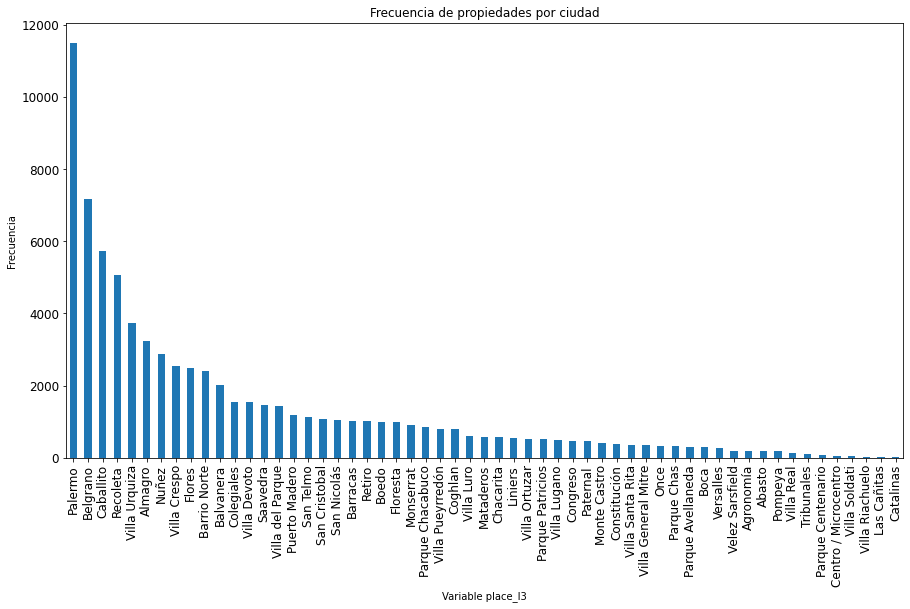

In [1410]:
fig, ax = plt.subplots()
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12)
plt.title('Frecuencia de propiedades por ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l3')

In [1411]:
print(f"place_l4 tiene {df.nunique()['place_l4']} valores diferentes")

place_l4 tiene 4 valores diferentes


Text(0.5, 0, 'Variable place_l4')

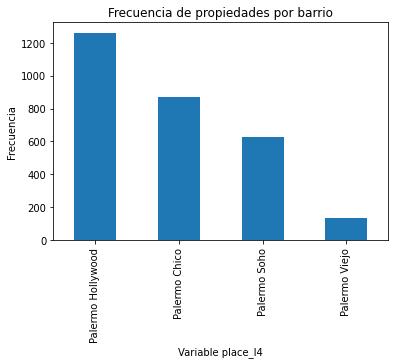

In [1412]:
fig, ax = plt.subplots()
df['place_l4'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Variable place_l4')

In [1413]:
print(f"property_type tiene {df.nunique()['property_type']} valores diferentes")

property_type tiene 3 valores diferentes


Text(0.5, 0, 'Variable property_type')

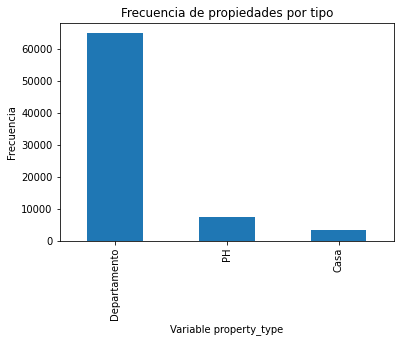

In [1414]:
fig, ax = plt.subplots()
df['property_type'].value_counts().plot(ax=ax, kind='bar')
plt.title('Frecuencia de propiedades por tipo')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_type')

### Determinación de Variables Irrelevantes

---

Finalmente, podremos decir que dejamos fuera de este análisis particular a las a las siguientes variables que detallamos a continuación:

- `id`: No contiene información relevante para el análisis.
- `operation`: Sólo hay un tipo de operación según lo solicitado en la consigna y es "Venta", con lo cual la consideramos irrelevante en el análisis.
- `property_currency`: Sólo hay un tipo de cambio según lo solicitado en la consigna y es "USD", con lo cual la consideramos irrelevante en el análisis.
- `place_l5`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `place_l6`: De analizar previamente el dataset con el cual estamos trabajando, detectamos que la columna en cuestión se encuentra vacía, con lo cual la consideramos irrelevante en el análisis.
- `property_title`: De conocer previamente la información que contiene el dataset, sabemos que la variable en cuestión almacena un único título por publicación, con lo cual la consideramos irrelevante en el análisis.

Procedemos a eliminar del dataset las mismas:

In [1415]:
df.drop("id", inplace=True, axis=1)
df.drop("start_date", inplace=True, axis=1)
df.drop("end_date", inplace=True, axis=1)
df.drop("created_on", inplace=True, axis=1)
df.drop("place_l5", inplace=True, axis=1)
df.drop("place_l6", inplace=True, axis=1)
df.drop("operation", inplace=True, axis=1)
df.drop("property_currency", inplace=True, axis=1)
df.drop("property_title", inplace=True, axis=1)
df.columns.tolist()

['latitud',
 'longitud',
 'place_l2',
 'place_l3',
 'place_l4',
 'property_type',
 'property_rooms',
 'property_bedrooms',
 'property_surface_total',
 'property_surface_covered',
 'property_price']

Replicamos la eliminación de variables irrelevantes para el dataset de test:

In [1416]:
test.drop("id", inplace=True, axis=1)
test.drop("start_date", inplace=True, axis=1)
test.drop("end_date", inplace=True, axis=1)
test.drop("created_on", inplace=True, axis=1)
test.drop("place_l5", inplace=True, axis=1)
test.drop("place_l6", inplace=True, axis=1)
test.drop("operation", inplace=True, axis=1)
test.drop("property_currency", inplace=True, axis=1)
test.drop("property_title", inplace=True, axis=1)

### Análisis Gráfico de las Distribuciones de las Variables

---



#### Densidad de la variable `property_price`

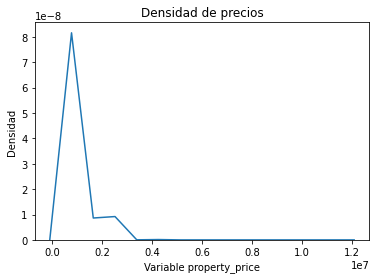

In [1417]:
d = sns.kdeplot(data=df.property_price, gridsize=15).set(title="Densidad de precios",xlabel="Variable property_price",ylabel="Densidad")

#### Densidad de la variable `property_rooms`

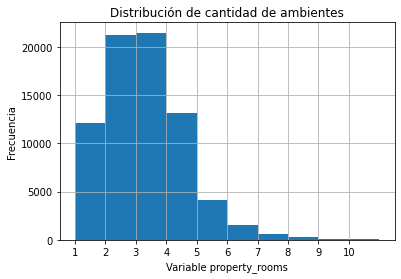

In [1418]:
plt.hist(df.property_rooms, bins=10, range=(1,11))
plt.title('Distribución de cantidad de ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_rooms')
plt.xticks(np.arange(1,11,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_bedrooms`

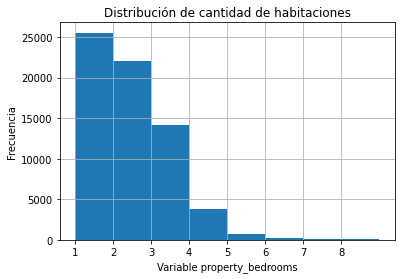

In [1419]:
plt.hist(df.property_bedrooms, bins=8, range=(1,9))
plt.title('Distribución de cantidad de habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Variable property_bedrooms')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

#### Densidad de la variable `property_surface_covered`

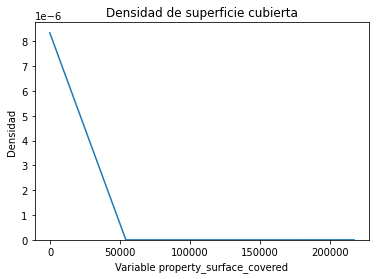

In [1420]:
d = sns.kdeplot(data=df.property_surface_covered, gridsize=5).set(title="Densidad de superficie cubierta",xlabel="Variable property_surface_covered",ylabel="Densidad")

### Análisis de las Correlaciones existentes entre las Variables

---

In [1421]:
#graf_pairplot = sns.pairplot(data=df)

### Conclusiones
----

Luego de tener este primer acercamiento con el dataset pudimos realizar varias observaciones. 

En un primer lugar, luego de explorar las distintas variables que este comprendía, llegamos a la conclusión de que contábamos con varias que ante nuestro problema no iban a presentar relevancia. Es por esta razón que decidimos suprimirlas de nuestros datasets de trabajo, tanto para train como para el que luego usaremos para realizar los tests. 

Además de esto, notamos que teníamos diferencias en los tipos de variables con las cuales contábamos, razón por la cual decidimos explicitar las que se correspondian a cuantitativas o cualitativas, ya que estas aclaraciones luego nos serán de utilidad al momento de determinar los gráficos a realizar. Estos además, nos sirvieron para identificar y tener dimensión de las distribuciones y que tan relacionadas están nuestras variables entre sí. 

Por último realizamos los cálculos de las medidas de resumen sobre estas variables resultantes, las cuales estaremos utilizando para realizar diferentes operaciones a lo largo del trabajo.

## **1b. Datos Faltantes**

A continuación se realizara un análisis sobre los datos faltantes del dataframe.

### Análisis a Nivel Columna

---



Graficamos, para cada variable, el porcentaje (diferente de cero) de datos faltantes con respecto al total del dataset en escala logarítmica.

Text(0.5, 0, 'Variables del dataset')

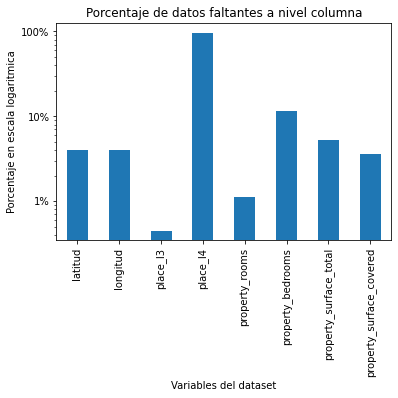

In [1422]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter())
(df.isnull().sum() * 100 / len(df)).replace(0,np.nan).dropna(axis=0,how="all").plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel columna')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Variables del dataset')

### Análisis a Nivel Fila

---



Graficamos el porcentaje de filas con n datos faltantes con respecto al total del dataset.

Text(0.5, 0, 'Cantidad de datos faltantes')

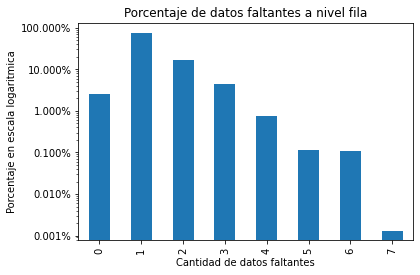

In [1423]:
fig, ax = plt.subplots()
ax.set_yscale('log')
ax.yaxis.set_major_formatter(PercentFormatter(decimals=3))
(df.isnull().sum(axis=1).value_counts().sort_index() * 100 / len(df)).plot(ax=ax, kind='bar')
plt.title('Porcentaje de datos faltantes a nivel fila')
plt.ylabel('Porcentaje en escala logaritmica')
plt.xlabel('Cantidad de datos faltantes')

### Reparación de Valores Faltantes

---



A continuación se detallan posibles estrategias para reparar los valores faltantes del dataset.

Guardamos una copia del dataset sin imputaciones realizadas para comparar más adelante:

In [1424]:
df_sin_reparacion = df.copy()

#### Variables `place_l3` y `place_l4`

Reemplazamos las locaciones no definidas por el nivel superior:

In [1425]:
df.place_l3.fillna(df.place_l2, inplace=True)
df.place_l4.fillna(df.place_l3, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `place_l3`:


In [1426]:
df["place_l3"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `place_l4`:


In [1427]:
df["place_l4"].isna().sum()

0

Replicamos para el dataset de test:

In [1428]:
test.place_l3.fillna(test.place_l2, inplace=True)
test.place_l4.fillna(test.place_l3, inplace=True)

In [1429]:
test["place_l3"].isna().sum()

0

In [1430]:
test["place_l4"].isna().sum()

0

#### Variables `latitud` y `longitud`

Imputamos, a partir de las medias de las variables `latitud` y `longitud` agrupando según los valores de `place_l4` los valores faltantes de `latitud` y `longitud`. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada barrio. Para visualizar las diferencias en la variable previas y posteriores a la imputación de datos, graficamos -a modo de ejemplo- la densidad para el barrio de Palermo:

In [1431]:
medians_latitudes = {}

for barrio in df["place_l4"].unique() :
    lat_median = df.loc[(df["place_l4"] == barrio) & (df['latitud'].notna())].latitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"] = df.loc[(df["place_l4"] == barrio) & (df['latitud'].isna()), "latitud"].fillna(lat_median)
    medians_latitudes[barrio] = lat_median

Veamos los valores resultantes en el diccionaro de medias de latitudes:

In [1432]:
medians_latitudes

{'Caballito': -34.6194061,
 'Puerto Madero': -34.6126394,
 'Balvanera': -34.60831005,
 'San Nicolás': -34.6030779,
 'Retiro': -34.59610936185,
 'Villa Urquiza': -34.5736133,
 'Villa del Parque': -34.604529691799996,
 'Colegiales': -34.5760225,
 'Villa Crespo': -34.598273692099994,
 'Almagro': -34.6058615,
 'San Telmo': -34.6209352,
 'Flores': -34.6286921369,
 'Palermo': -34.5820981,
 'Palermo Chico': -34.5794167,
 'Nuñez': -34.548096650000005,
 'Barracas': -34.6358354,
 'Villa General Mitre': -34.610502100000005,
 'Belgrano': -34.5623790515,
 'Parque Avellaneda': -34.6448557,
 'Parque Chacabuco': -34.6347007,
 'Versalles': -34.6296804,
 'Recoleta': -34.5920227,
 'Boedo': -34.62756628955,
 'Monte Castro': -34.621131,
 'Palermo Hollywood': -34.58057085,
 'Villa Real': -34.6207965,
 'Boca': -34.63204751155,
 'Barrio Norte': -34.59381705,
 'Saavedra': -34.5512603978,
 'Coghlan': -34.5614349,
 'Velez Sarsfield': -34.63229,
 'Mataderos': -34.6551649,
 'Villa Ortuzar': -34.5821500876,
 'Pater

In [1433]:
medians_longitudes = {}

for barrio in df["place_l4"].unique() :
    long_median = df.loc[(df["place_l4"] == barrio) & (df['longitud'].notna())].longitud.median()
    df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"] = df.loc[(df["place_l4"] == barrio) & (df['longitud'].isna()), "longitud"].fillna(long_median)
    medians_longitudes[barrio] = long_median

Veamos los valores resultantes en el diccionaro de medias de longitudes:

In [1434]:
medians_longitudes

{'Caballito': -58.4412248,
 'Puerto Madero': -58.3618883,
 'Balvanera': -58.402031449999996,
 'San Nicolás': -58.3834625,
 'Retiro': -58.3785708,
 'Villa Urquiza': -58.4861351,
 'Villa del Parque': -58.48984955,
 'Colegiales': -58.45016895,
 'Villa Crespo': -58.4407171,
 'Almagro': -58.4223603,
 'San Telmo': -58.3748503,
 'Flores': -58.46332195,
 'Palermo': -58.42346605,
 'Palermo Chico': -58.4072524,
 'Nuñez': -58.46633,
 'Barracas': -58.3739745,
 'Villa General Mitre': -58.4683198,
 'Belgrano': -58.4544909,
 'Parque Avellaneda': -58.477562,
 'Parque Chacabuco': -58.4379678,
 'Versalles': -58.5200459,
 'Recoleta': -58.3959194307,
 'Boedo': -58.41800275,
 'Monte Castro': -58.504708,
 'Palermo Hollywood': -58.435209650000004,
 'Villa Real': -58.5244913,
 'Boca': -58.3629598,
 'Barrio Norte': -58.40413825,
 'Saavedra': -58.4824258,
 'Coghlan': -58.474658500000004,
 'Velez Sarsfield': -58.4926237,
 'Mataderos': -58.5035614,
 'Villa Ortuzar': -58.4689315,
 'Paternal': -58.4646755,
 'Parque

Calculamos la cantidad de datos nulos restantes para la variable `latitud`:


In [1435]:
df["latitud"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `longitud`:


In [1436]:
df["longitud"].isna().sum()

0

Replicamos para el dataset de test:

In [1437]:
for barrio in test["place_l4"].unique() :
    lat_median = medians_latitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"] = test.loc[(test["place_l4"] == barrio) & (test['latitud'].isna()), "latitud"].fillna(lat_median)

In [1438]:
for barrio in test["place_l4"].unique() :
    long_median = medians_longitudes[barrio]
    test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"] = test.loc[(test["place_l4"] == barrio) & (test['longitud'].isna()), "longitud"].fillna(long_median)

In [1439]:
test["latitud"].isna().sum()

0

In [1440]:
test["longitud"].isna().sum()

0

#### Variables `property_surface_total` y `property_surface_covered`

Cuando se tiene la superficie total pero no la cubierta o viceversa, reemplazamos los valores faltantes con su contraparte

In [1441]:
df.property_surface_total.fillna(df.property_surface_covered, inplace=True)
df.property_surface_covered.fillna(df.property_surface_total, inplace=True)

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_total`:


In [1442]:
df["property_surface_total"].isna().sum()

0

Calculamos la cantidad de datos nulos restantes para la variable `property_surface_covered`:

In [1443]:
df["property_surface_covered"].isna().sum()

0

Replicamos para el dataset de test:

In [1444]:
test.property_surface_total.fillna(test.property_surface_covered, inplace=True)
test.property_surface_covered.fillna(test.property_surface_total, inplace=True)

In [1445]:
test["property_surface_total"].isna().sum()

0

In [1446]:
test["property_surface_covered"].isna().sum()

0

#### Variables `property_rooms` y `property_bedrooms`

Reemplazamos la cantidad de habitaciones no definidas por la media calculada filtrando por cantidad total de dormitorios. Para replicar este comportamiento en el dataset de test, almacenamos en un diccionario de medias las correspondientes a cada cantidad de ambientes.

In [1447]:
cant = df.loc[(df['property_rooms'].isna()) & (df['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values
medians_rooms = {}

for i in cant:
    median = df.loc[(df['property_rooms'].notna()) & (df['property_bedrooms'] == i)].property_rooms.median()
    df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"] = df.loc[(df['property_rooms'].isna()) & (df["property_bedrooms"] == i), "property_rooms"].fillna(median)
    medians_rooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de ambientes:

In [1448]:
medians_rooms

{3.0: 4.0,
 2.0: 3.0,
 4.0: 5.0,
 1.0: 2.0,
 5.0: 6.0,
 6.0: 7.0,
 7.0: 8.0,
 10.0: 12.0,
 8.0: 9.0,
 11.0: 11.0,
 9.0: 10.0,
 14.0: 15.0,
 13.0: 15.0,
 12.0: 14.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [1449]:
df["property_rooms"].isna().sum()

341

Para eliminar los últimos valores nulos en las columnas de ambientes, lo completamos con una regresión en funcion de la superficie cubierta:

In [1450]:
df_rooms = df.loc[df['property_rooms'].notna()]
reg_rooms = LinearRegression().fit(np.array(df_rooms['property_surface_covered']).reshape(-1, 1), df_rooms['property_rooms'])

In [1451]:
df_topredict = df.loc[df['property_rooms'].isna()]['property_surface_covered']
df['property_rooms'] = df.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

Calculamos la cantidad de datos nulos restantes para la variable `property_rooms`:


In [1452]:
df["property_rooms"].isna().sum()

0

Luego reemplazamos la cantidad total de dormitorios no definidas por la media calculada filtrando por cantidad de ambientes.

Esto redujo el porcentaje de valores no definidos para los dormitorios y ambientes a menos de 1%, desde 10% y 1,5% respectivamente.

In [1453]:
cant = df.loc[(df['property_bedrooms'].isna()) & (df['property_rooms'].notna())].property_rooms.value_counts().index.values
medians_bedrooms = {}

for i in cant:
    median = df.loc[df['property_rooms'] == i].property_bedrooms.median()
    if pd.isna(median):
        median = df.loc[df['property_rooms'] == i]['property_rooms'].iloc[0]
    df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"] = df.loc[(df['property_bedrooms'].isna()) & (df["property_rooms"] == i), "property_bedrooms"].fillna(median)
    medians_bedrooms[i] = median

Veamos los valores resultantes en el diccionaro de medias de dormitorios:

In [1454]:
medians_bedrooms

{1.0: 1.0,
 3.0: 2.0,
 2.0: 1.0,
 4.0: 3.0,
 5.0: 4.0,
 6.0: 4.0,
 7.0: 4.0,
 10.0: 6.0,
 12.0: 8.0,
 9.0: 5.0,
 8.0: 5.0,
 15.0: 13.0,
 11.0: 8.0,
 35.0: 35.0,
 33.0: 33.0,
 14.0: 11.0}

Calculamos la cantidad de datos nulos restantes para la variable `property_bedrooms`:



In [1455]:
df["property_bedrooms"].isna().sum()

0

Replicamos para el dataset de test:

In [1456]:
cant = test.loc[(test['property_rooms'].isna()) & (test['property_bedrooms'].notna())].property_bedrooms.value_counts().index.values

for i in cant:
    median = medians_rooms[i]
    test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"] = test.loc[(test['property_rooms'].isna()) & (test["property_bedrooms"] == i), "property_rooms"].fillna(median)

In [1457]:
test['property_rooms'] = test.apply(lambda x: round(reg_rooms.predict([[x.property_surface_covered]])[0]) if pd.isna(x.property_rooms) else x.property_rooms, axis=1)

In [1458]:
test["property_rooms"].isna().sum()

0

In [1459]:
cant = test.loc[(test['property_bedrooms'].isna()) & (test['property_rooms'].notna())].property_rooms.value_counts().index.values

for i in cant:
    if i not in medians_bedrooms:
        median = test.loc[test['property_rooms'] == i]['property_rooms'].iloc[0]
    else:
        median = medians_bedrooms[i]
    test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"] = test.loc[(test['property_bedrooms'].isna()) & (test["property_rooms"] == i), "property_bedrooms"].fillna(median)

In [1460]:
test["property_bedrooms"].isna().sum()

0

#### Conclusiones

A partir de la presencia de valores faltantes en cada una de las variables trabajadas, realizamos distintos tipos de imputaciones según lo que requería cada una, entre ellos: completar con el nivel inmediatamente anterior, reemplazar con el valor de la media correspondiente, y, predecir mediante regresión lineal.

Para las variables `place_l3` y `place_l4` tomamos la decisión de completar los valores faltantes con el valor previo dado que las mismas son de tipo `str` y no admiten cálculos numéricos. A continuación, podemos apreciar la diferencia obtenida entre las distribuciones de las variables previas y posteriores a la imputación de datos.

Text(0.5, 0, 'Ciudades')

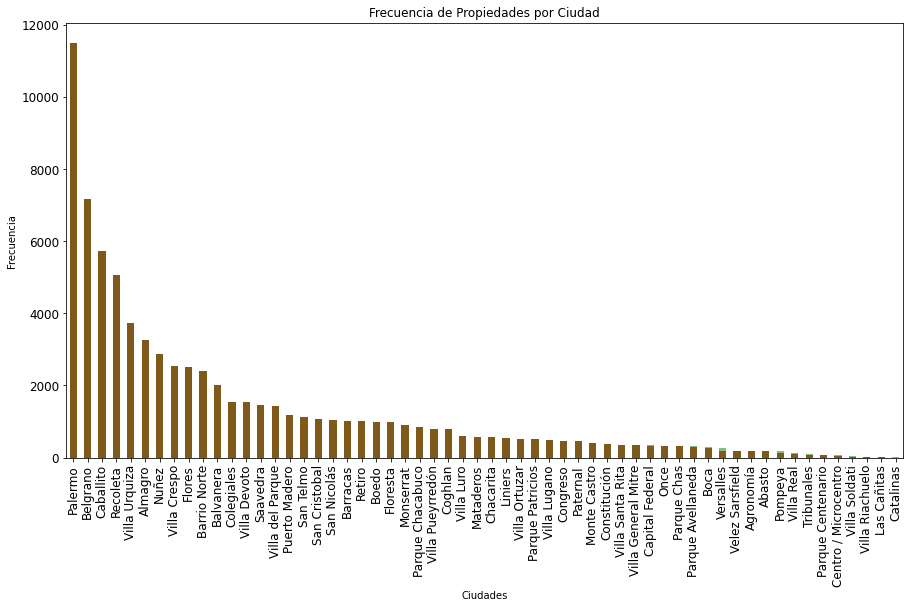

In [1461]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l3'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Ciudad')
plt.ylabel('Frecuencia')
plt.xlabel('Ciudades')

Como podemos notar, al ser bajo el porcentaje de datos faltantes para la variable `place_l3`, la distribución de la misma no presenta grandes cambios a pesar de la imputación realizada.

Text(0.5, 0, 'Barrios')

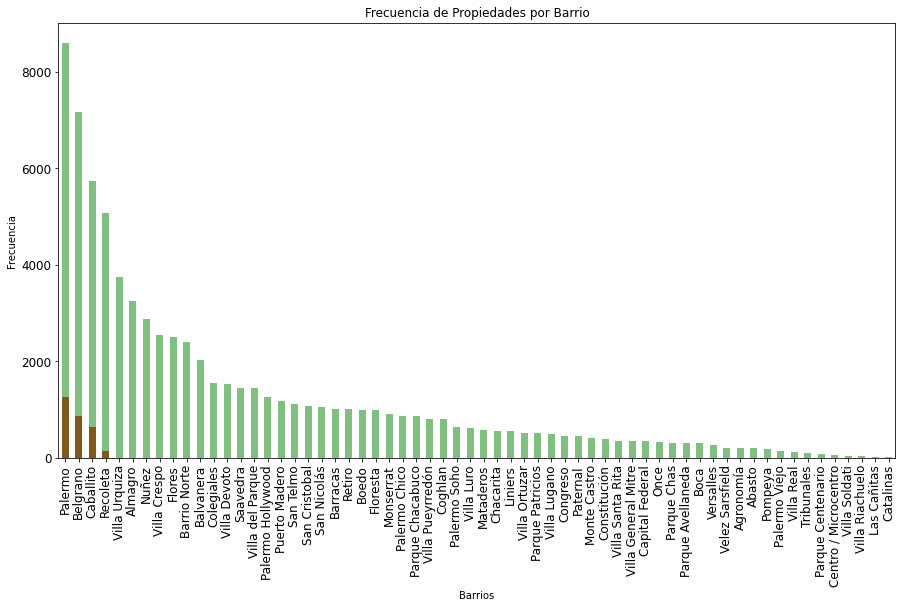

In [1462]:
fig, ax = plt.subplots()
df_sin_reparacion['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="red", alpha=0.8)
df['place_l4'].value_counts().plot(ax=ax, kind='bar', figsize=(15,8), fontsize=12, color="green", alpha=0.5)
plt.title('Frecuencia de Propiedades por Barrio')
plt.ylabel('Frecuencia')
plt.xlabel('Barrios')

Por el contrario de lo observado en el gráfico anterior, dado que la variable `place_l4` tenía un alto grado de valores faltantes (casi del 100% sobre todo el dataset), y puesto que los mismos fueron reemplazados por su antecesor inmediato (es decir: los valores existentes en `place_l3`) es esperable que la distribución de la misma tenga un cambio significativo luego de la imputación realizada. Más aún: es inclusive muy similar a la distribución de `place_l3`.

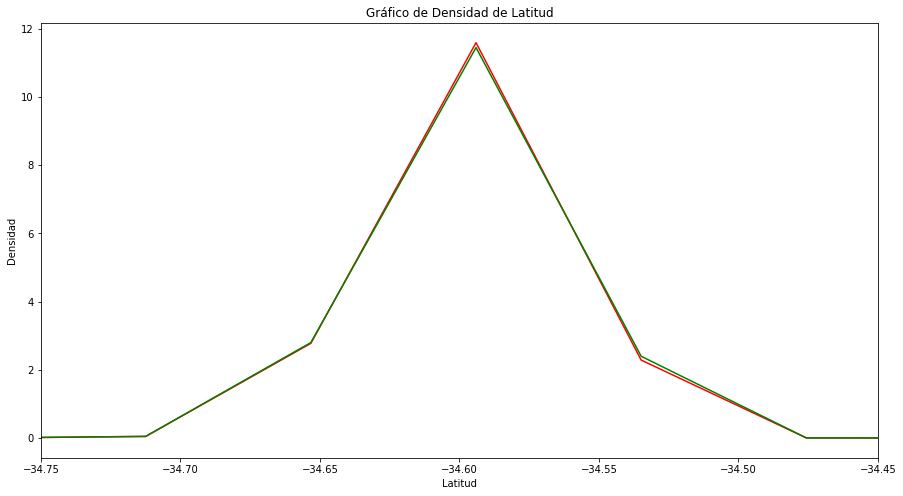

In [1463]:
df_sin_reparacion.latitud.plot.density(color = "red")
grf = df.latitud.plot.density(color = "green", figsize=(15,8), xlim = (-34.75,-34.45)).set(xlabel="Latitud", ylabel="Densidad", title="Gráfico de Densidad de Latitud")

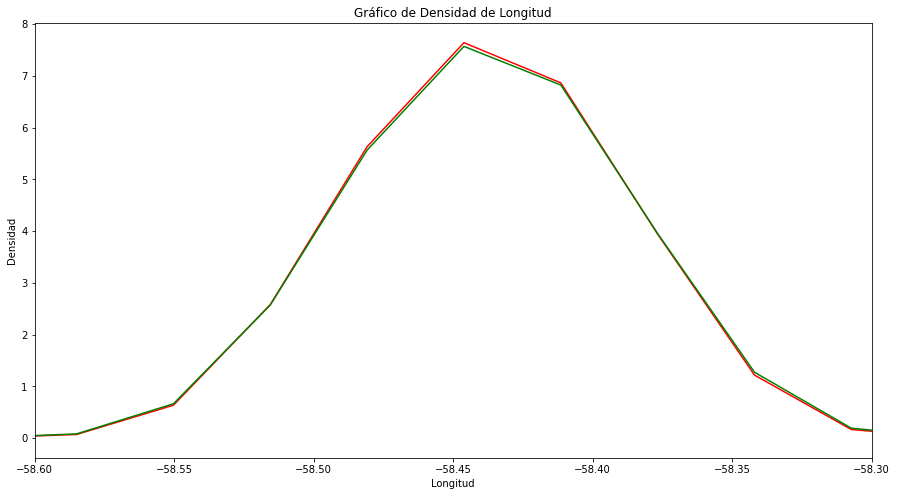

In [1464]:
df_sin_reparacion.longitud.plot.density(color = "red")
grf = df.longitud.plot.density(color = "green", figsize=(15,8), xlim = (-58.6,-58.3)).set(xlabel="Longitud", ylabel="Densidad", title="Gráfico de Densidad de Longitud")

Tanto para las variables de `latitud` y `longitud`, el método que utilizamos fue el de reemplazar los valores faltantes por las medias correspondientes. Como podemos ver en los gráficos anteriores, estas variables tenían un pequeño porcentaje de datos ausentes, de modo que sus distribuciones no tienen cambios significativos a pesar de la imputación realizada.

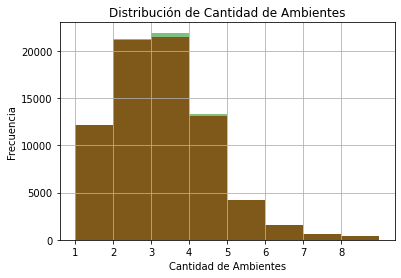

In [1465]:
plt.hist(df_sin_reparacion.property_rooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_rooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Ambientes')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Ambientes')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

Teniendo en cuenta que la proporción de valores faltantes en la variable `property_rooms` representa una cantidad significativa pero no de alto impacto sobre la totalidad del dataset, es esperable que al comparar los resultados obtenidos respecto de los iniciales no obtengamos una alta diferencia entre los mismos.

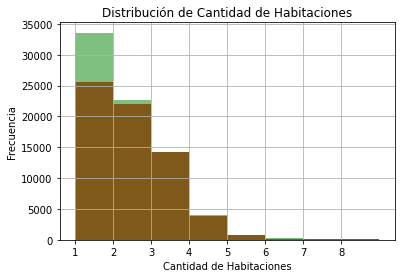

In [1466]:
plt.hist(df_sin_reparacion.property_bedrooms, bins=8, range=(1,9), color="red", alpha=0.8)
plt.hist(df.property_bedrooms, bins=8, range=(1,9), color="green", alpha=0.5)
plt.title('Distribución de Cantidad de Habitaciones')
plt.ylabel('Frecuencia')
plt.xlabel('Cantidad de Habitaciones')
plt.xticks(np.arange(1,9,1))
plt.grid(True)
plt.show()

A diferencia del análisis previo, podemos observar que al aumentar la cantidad de datos faltantes para la variable `property_bedrooms` -respecto de `property_rooms`-, tenemos un mayor nivel de diferencia entre las distribuciones de la variable previa y posteriormente a la imputación realizada.

Finalmente, podemos verificar que la totalidad de datos faltantes sobre los datasets tanto de train como de test fue reparada:

In [1467]:
df.isna().sum()

latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
dtype: int64

In [1468]:
test.isna().sum()

latitud                     0
longitud                    0
place_l2                    0
place_l3                    0
place_l4                    0
property_type               0
property_rooms              0
property_bedrooms           0
property_surface_total      0
property_surface_covered    0
property_price              0
dtype: int64

## **1c. Valores atípicos**

A continuación se realizara un análisis sobre los valores atípicos presentes en el dataframe. En la totalidad del dataset logramos detectar outliers tanto univariados (presentes en una unica variable) como multivariados (se encuentran en un espacio n-dimensional).

### Outliers univariados

---

Para el análisis de outliers de tipo univariados estaremos utilizando tanto el método de Box Plot como los métodos de Z-Score y Z-Score Modificado.

Mientras que el primero nos brindará información respecto de los topes superiores e inferiores de los cuartiles Q3 y Q1 respectivamente, los gráficos de Z-Score y Z-Score modificado nos permitirán visualizar de forma eficiente cómo se distribuye la masa de observaciones respecto de la media, y -por tanto- poder determinar de forma más precisa cuáles son los valores atípicos.

Por último, podremos destacar cuáles son las características de los valores en cuestión pudiendo clasificar los mismos en: global, contextual y colectivo.

#### Property rooms

Realizamos un análisis de la cantidad de habitaciones según el tipo de propiedad. Para ello, separamos los datasets:

In [1469]:
df_depto = df[df.property_type == 'Departamento']
df_casa = df[df.property_type == 'Casa']
df_ph = df[df.property_type == 'PH']

##### Box plot

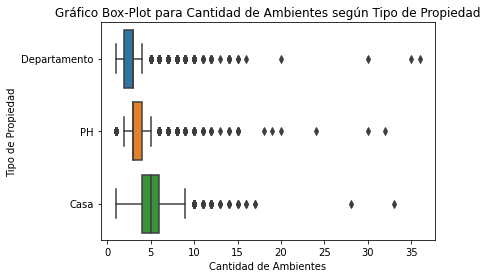

In [1470]:
sns.boxplot(data=df, x="property_rooms", y="property_type")
plt.title('Gráfico Box-Plot para Cantidad de Ambientes según Tipo de Propiedad')
plt.xlabel('Cantidad de Ambientes')
plt.ylabel('Tipo de Propiedad')
plt.show()

###### Departamento

In [1471]:
Q1_property_rooms=df[df.property_type == 'Departamento'].describe().get("property_rooms").get("25%")
Q3_property_rooms=df[df.property_type == 'Departamento'].describe().get("property_rooms").get("75%")

print("El valor de Q1 para Departamento es:", Q1_property_rooms)
print("El valor de Q3 para Departamento es:", Q3_property_rooms)

IQR_property_rooms=Q3_property_rooms-Q1_property_rooms

out_inf_depto=Q1_property_rooms-1.5*IQR_property_rooms
out_sup_depto=Q3_property_rooms+1.5*IQR_property_rooms
print("El limite inferior del Q1 para Departamento es:", out_inf_depto)
print("El limite superior del Q3 para Departamento es:", out_sup_depto)

El valor de Q1 para Departamento es: 2.0
El valor de Q3 para Departamento es: 3.0
El limite inferior del Q1 para Departamento es: 0.5
El limite superior del Q3 para Departamento es: 4.5


Estudiemos a qué corresponden los outliers encontrados por este método para los registros de tipo departamento:

In [1472]:
df[(df.property_rooms >= out_sup_depto) & (df.property_type == 'Departamento')].sort_values(by=['property_rooms'], ascending=False).head(5)

latitud   longitud         place_l2          place_l3  \
147916 -34.602919 -58.386844  Capital Federal        Tribunales   
150885 -34.642037 -58.438995  Capital Federal  Parque Chacabuco   
21009  -34.616391 -58.456038  Capital Federal         Caballito   
211468 -34.618153 -58.362615  Capital Federal     Puerto Madero   
362696 -34.618485 -58.377993  Capital Federal         San Telmo   

                place_l4 property_type  property_rooms  property_bedrooms  \
147916        Tribunales  Departamento            36.0               18.0   
150885  Parque Chacabuco  Departamento            35.0               35.0   
21009          Caballito  Departamento            30.0                2.0   
211468     Puerto Madero  Departamento            20.0                1.0   
362696         San Telmo  Departamento            16.0               16.0   

        property_surface_total  property_surface_covered  property_price  
147916                  1348.0                    1348.0       1700000.0  
150885                    37.0                      33.0         67000.0  
21009                     79.0                      79.0        230000.0  
211468                    37.0                      31.0        350000.0  
362696                   943.0                     943.0       1300000.0

In [1473]:
print(f"Las observaciones de cantidad de ambientes reportadas como outliers son: ")
print(f"{sorted(list(df[(df.property_rooms >= out_sup_depto) & (df.property_type == 'Departamento')].property_rooms.unique()))}")

Las observaciones de cantidad de ambientes reportadas como outliers son: 
[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 20.0, 30.0, 35.0, 36.0]


Podríamos pensar que es extraño que un departamento contara con más de 5 ambientes, de modo que sería factible proceder a eliminar dichos valores encontrados como outliers por este método.

Veamos qué porcentaje representa dicha información sobre el total de los datos:

In [1474]:
pct = df[(df.property_rooms > 5) & (df.property_type == 'Departamento')].property_rooms.shape[0] / df[df.property_type == 'Departamento'].property_rooms.shape[0] * 100
print(f"El {round(pct,4)}% de los departamentos publicados son considerados outliers a partir del análisis con el método de Box Plot.")

El 2.2123% de los departamentos publicados son considerados outliers a partir del análisis con el método de Box Plot.


###### Casa

In [1475]:
Q1_property_rooms=df[df.property_type == 'Casa'].describe().get("property_rooms").get("25%")
Q3_property_rooms=df[df.property_type == 'Casa'].describe().get("property_rooms").get("75%")

print("El valor de Q1 para Casa es:", Q1_property_rooms)
print("El valor de Q3 para Casa es:", Q3_property_rooms)

IQR_property_rooms=Q3_property_rooms-Q1_property_rooms

out_inf_casa=Q1_property_rooms-1.5*IQR_property_rooms
out_sup_casa=Q3_property_rooms+1.5*IQR_property_rooms
print("El limite inferior del Q1 para Casa es:", out_inf_casa)
print("El limite superior del Q3 para Casa es:", out_sup_casa)

El valor de Q1 para Casa es: 4.0
El valor de Q3 para Casa es: 6.0
El limite inferior del Q1 para Casa es: 1.0
El limite superior del Q3 para Casa es: 9.0


Estudiemos a qué corresponden los outliers encontrados por este método para los registros de tipo casa:

In [1476]:
df[(df.property_rooms >= out_sup_casa) & (df.property_type == 'Casa')].sort_values(by=['property_rooms'], ascending=False).head(5)

latitud   longitud         place_l2          place_l3  \
1932   -34.637026 -58.426283  Capital Federal  Parque Chacabuco   
389282 -34.570959 -58.458106  Capital Federal          Belgrano   
402448 -34.611413 -58.389221  Capital Federal         Monserrat   
90686  -34.590064 -58.395623  Capital Federal          Recoleta   
225809 -34.616239 -58.371198  Capital Federal         San Telmo   

                place_l4 property_type  property_rooms  property_bedrooms  \
1932    Parque Chacabuco          Casa            33.0               33.0   
389282          Belgrano          Casa            28.0               16.0   
402448         Monserrat          Casa            17.0               16.0   
90686           Recoleta          Casa            17.0                8.0   
225809         San Telmo          Casa            16.0               12.0   

        property_surface_total  property_surface_covered  property_price  
1932                  217000.0                  217000.0        250000.0  
389282                   845.0                     845.0        950000.0  
402448                   585.0                     458.0        880000.0  
90686                    616.0                     616.0       2100000.0  
225809                   580.0                     580.0        580000.0

In [1477]:
print(f"Las observaciones de cantidad de ambientes reportadas como outliers son: ")
print(f"{sorted(list(df[(df.property_rooms >= out_sup_casa) & (df.property_type == 'Casa')].property_rooms.unique()))}")

Las observaciones de cantidad de ambientes reportadas como outliers son: 
[9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 28.0, 33.0]


Podríamos pensar que es extraño que una casa contara con más de 10 ambientes, de modo que sería factible proceder a eliminar dichos valores encontrados como outliers por este método.

Veamos qué porcentaje representa dicha información sobre el total de los datos:

In [1478]:
pct = df[(df.property_rooms > 10) & (df.property_type == 'Casa')].property_rooms.shape[0] / df[df.property_type == 'Casa'].property_rooms.shape[0] * 100
print(f"El {round(pct,4)}% de las casas publicadas son consideradas outliers a partir del análisis con el método de Box Plot.")

El 1.3901% de las casas publicadas son consideradas outliers a partir del análisis con el método de Box Plot.


###### PH

In [1479]:
Q1_property_rooms=df[df.property_type == 'PH'].describe().get("property_rooms").get("25%")
Q3_property_rooms=df[df.property_type == 'PH'].describe().get("property_rooms").get("75%")

print("El valor de Q1 para PH es:", Q1_property_rooms)
print("El valor de Q3 para PH es:", Q3_property_rooms)

IQR_property_rooms=Q3_property_rooms-Q1_property_rooms

out_inf_ph=Q1_property_rooms-1.5*IQR_property_rooms
out_sup_ph=Q3_property_rooms+1.5*IQR_property_rooms
print("El limite inferior del Q1 para PH es:", out_inf_ph)
print("El limite superior del Q3 para PH es:", out_sup_ph)

El valor de Q1 para PH es: 3.0
El valor de Q3 para PH es: 4.0
El limite inferior del Q1 para PH es: 1.5
El limite superior del Q3 para PH es: 5.5


Estudiemos a qué corresponden los outliers encontrados por este método para los registros de tipo PH:

In [1480]:
df[(df.property_rooms >= out_sup_ph) & (df.property_type == 'PH')].sort_values(by=['property_rooms'], ascending=False).head(5)

latitud   longitud         place_l2           place_l3  \
90004  -34.633236 -58.480313  Capital Federal           Floresta   
52157  -34.649872 -58.483012  Capital Federal  Parque Avellaneda   
292167 -34.616487 -58.371596  Capital Federal          San Telmo   
285222 -34.638432 -58.369712  Capital Federal           Barracas   
32758  -34.632698 -58.360514  Capital Federal               Boca   

                 place_l4 property_type  property_rooms  property_bedrooms  \
90004            Floresta            PH            32.0               32.0   
52157   Parque Avellaneda            PH            30.0                2.0   
292167          San Telmo            PH            24.0               22.0   
285222           Barracas            PH            20.0               17.0   
32758                Boca            PH            19.0               18.0   

        property_surface_total  property_surface_covered  property_price  
90004                    535.0                     435.0        300000.0  
52157                     72.0                      60.0        123500.0  
292167                   800.0                     650.0        350000.0  
285222                   807.0                     470.0        640000.0  
32758                    372.0                     318.0        159000.0

In [1481]:
print(f"Las observaciones de cantidad de ambientes reportadas como outliers son: ")
print(f"{sorted(list(df[(df.property_rooms >= out_sup_ph) & (df.property_type == 'PH')].property_rooms.unique()))}")

Las observaciones de cantidad de ambientes reportadas como outliers son: 
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 18.0, 19.0, 20.0, 24.0, 30.0, 32.0]


Podríamos pensar que es extraño que un PH contara con más de 7 ambientes, de modo que sería factible proceder a eliminar dichos valores encontrados como outliers por este método.

Veamos qué porcentaje representa dicha información sobre el total de los datos:

In [1482]:
pct = df[(df.property_rooms > 7) & (df.property_type == 'PH')].property_rooms.shape[0] / df[df.property_type == 'PH'].property_rooms.shape[0] * 100
print(f"El {round(pct,4)}% de los PH publicados son considerados outliers a partir del análisis con el método de Box Plot.")

El 1.4242% de los PH publicados son considerados outliers a partir del análisis con el método de Box Plot.


##### Z-Score

###### Departamento

In [1483]:
media_rooms_depto = np.mean(df_depto.property_rooms)
std_rooms_depto = np.std(df_depto.property_rooms)
df_depto['z_rooms'] = (df_depto.property_rooms - media_rooms_depto) / std_rooms_depto

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [1484]:
df_depto[df_depto['z_rooms']>3].head()

latitud   longitud         place_l2          place_l3  \
257091 -34.596154 -58.395994  Capital Federal          Recoleta   
150885 -34.642037 -58.438995  Capital Federal  Parque Chacabuco   
200731 -34.562379 -58.454491  Capital Federal          Belgrano   
97762  -34.566409 -58.432300  Capital Federal           Palermo   
80591  -34.590172 -58.385131  Capital Federal          Recoleta   

                place_l4 property_type  property_rooms  property_bedrooms  \
257091          Recoleta  Departamento             7.0                4.0   
150885  Parque Chacabuco  Departamento            35.0               35.0   
200731          Belgrano  Departamento             7.0                4.0   
97762            Palermo  Departamento             7.0                4.0   
80591           Recoleta  Departamento             9.0                5.0   

        property_surface_total  property_surface_covered  property_price  \
257091                   228.0                     228.0        600000.0   
150885                    37.0                      33.0         67000.0   
200731                   297.0                     297.0        890000.0   
97762                    498.0                     498.0       2500000.0   
80591                    335.0                     310.0        850000.0   

          z_rooms  
257091   3.398484  
150885  25.255412  
200731   3.398484  
97762    3.398484  
80591    4.959693

In [1485]:
df_depto[df_depto['z_rooms']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms]
Index: []

Notamos entonces la cantidad de outliers presentes en relacion a esta variable y siguiendo los metodos utilizados:

In [1486]:
df_depto[df_depto['z_rooms']>3].shape[0]

601

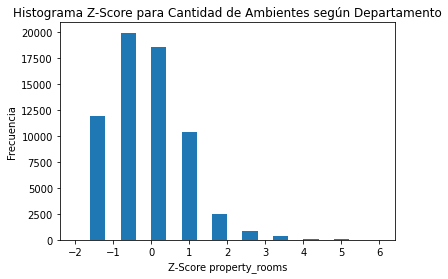

In [1487]:
plt.hist(df_depto.z_rooms, bins=20, range=(-2,6))
plt.title('Histograma Z-Score para Cantidad de Ambientes según Departamento')
plt.xlabel('Z-Score property_rooms')
plt.ylabel('Frecuencia')
plt.show()

###### Casa

In [1488]:
media_rooms_casa = np.mean(df_casa.property_rooms)
std_rooms_casa = np.std(df_casa.property_rooms)
df_casa['z_rooms'] = (df_casa.property_rooms - media_rooms_casa) / std_rooms_casa

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [1489]:
df_casa[df_casa['z_rooms']>3].head()

latitud   longitud         place_l2          place_l3  \
243306 -34.573683 -58.470382  Capital Federal          Belgrano   
323350 -34.594188 -58.408912  Capital Federal      Barrio Norte   
115342 -34.645539 -58.509067  Capital Federal        Villa Luro   
65039  -34.580976 -58.495637  Capital Federal  Villa Pueyrredón   
44741  -34.621988 -58.382205  Capital Federal      Constitución   

                place_l4 property_type  property_rooms  property_bedrooms  \
243306          Belgrano          Casa            11.0                9.0   
323350      Barrio Norte          Casa            12.0                5.0   
115342        Villa Luro          Casa            11.0               11.0   
65039   Villa Pueyrredón          Casa            11.0               11.0   
44741       Constitución          Casa            11.0                7.0   

        property_surface_total  property_surface_covered  property_price  \
243306                   537.0                     537.0       1120000.0   
323350                   420.0                     420.0        900000.0   
115342                   795.0                     795.0       1200000.0   
65039                    341.0                     341.0        360000.0   
44741                    212.0                     212.0        240000.0   

         z_rooms  
243306  3.230285  
323350  3.773485  
115342  3.230285  
65039   3.230285  
44741   3.230285

In [1490]:
df_casa[df_casa['z_rooms']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms]
Index: []

Notamos entonces la cantidad de outliers presentes en relacion a esta variable y siguiendo los metodos utilizados:

In [1491]:
df_casa[df_casa['z_rooms']>3].shape[0]

47

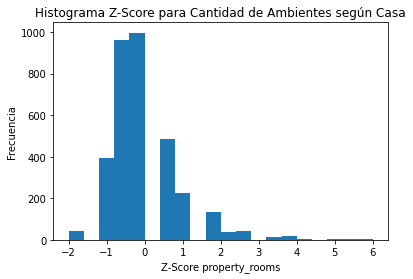

In [1492]:
plt.hist(df_casa.z_rooms, bins=20, range=(-2,6))
plt.title('Histograma Z-Score para Cantidad de Ambientes según Casa')
plt.xlabel('Z-Score property_rooms')
plt.ylabel('Frecuencia')
plt.show()

###### PH

In [1493]:
media_rooms_ph = np.mean(df_ph.property_rooms)
std_rooms_ph = np.std(df_ph.property_rooms)
df_ph['z_rooms'] = (df_ph.property_rooms - media_rooms_ph) / std_rooms_ph

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [1494]:
df_ph[df_ph['z_rooms']>3].head()

latitud   longitud         place_l2    place_l3    place_l4  \
275967 -34.612030 -58.415660  Capital Federal     Almagro     Almagro   
351451 -34.616935 -58.522459  Capital Federal  Villa Real  Villa Real   
292167 -34.616487 -58.371596  Capital Federal   San Telmo   San Telmo   
68434  -34.629169 -58.454926  Capital Federal   Caballito   Caballito   
296989 -34.577053 -58.459783  Capital Federal  Colegiales  Colegiales   

       property_type  property_rooms  property_bedrooms  \
275967            PH            12.0                8.0   
351451            PH             8.0                5.0   
292167            PH            24.0               22.0   
68434             PH             8.0                7.0   
296989            PH             8.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
275967                   315.0                     230.0        399000.0   
351451                   189.0                     139.0        189000.0   
292167                   800.0                     650.0        350000.0   
68434                    368.0                     268.0        490000.0   
296989                   340.0                     240.0        570000.0   

          z_rooms  
275967   5.883145  
351451   3.122047  
292167  14.166437  
68434    3.122047  
296989   3.122047

In [1495]:
df_ph[df_ph['z_rooms']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms]
Index: []

Notamos entonces la cantidad de outliers presentes en relacion a esta variable y siguiendo los metodos utilizados:

In [1496]:
df_ph[df_ph['z_rooms']>3].shape[0]

106

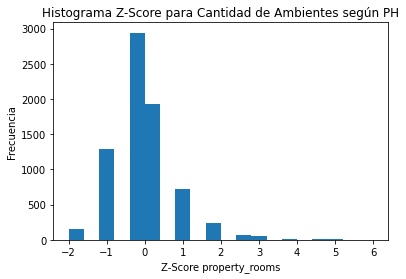

In [1497]:
plt.hist(df_ph.z_rooms, bins=20, range=(-2,6))
plt.title('Histograma Z-Score para Cantidad de Ambientes según PH')
plt.xlabel('Z-Score property_rooms')
plt.ylabel('Frecuencia')
plt.show()

##### Z-Score Modificado

###### Departamento

In [1498]:
mediana_room_depto = np.nanmedian(df_depto.property_rooms)
MAD = np.nanmedian(np.absolute(df_depto.property_rooms-mediana_room_depto))
df_depto['zm_rooms']=(df_depto.property_rooms - mediana_room_depto)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [1499]:
df_depto[(df_depto['zm_rooms']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
150885 -34.642037 -58.438995  Capital Federal  Parque Chacabuco   
80591  -34.590172 -58.385131  Capital Federal          Recoleta   
97890  -34.567858 -58.446164  Capital Federal          Belgrano   
257313 -34.586708 -58.388702  Capital Federal          Recoleta   
139327 -34.559671 -58.458406  Capital Federal          Belgrano   

                place_l4 property_type  property_rooms  property_bedrooms  \
150885  Parque Chacabuco  Departamento            35.0               35.0   
80591           Recoleta  Departamento             9.0                5.0   
97890           Belgrano  Departamento             9.0                3.0   
257313          Recoleta  Departamento             9.0                5.0   
139327          Belgrano  Departamento            10.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
150885                    37.0                      33.0         67000.0   
80591                    335.0                     310.0        850000.0   
97890                    390.0                     390.0       1250000.0   
257313                   266.0                     266.0        790000.0   
139327                   168.0                     168.0        620000.0   

          z_rooms  zm_rooms  
150885  25.255412   21.5840  
80591    4.959693    4.0470  
97890    4.959693    4.0470  
257313   4.959693    4.0470  
139327   5.740298    4.7215

In [1500]:
df_depto[(df_depto['zm_rooms']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms]
Index: []

Nuevamente evidenciamos cantidades.

In [1501]:
df_depto[(df_depto['zm_rooms']>3.5)].shape[0]

137

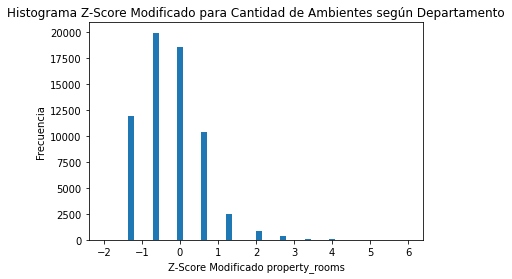

In [1502]:
plt.hist(df_depto.zm_rooms, bins=50, range=(-2,6))
plt.title('Histograma Z-Score Modificado para Cantidad de Ambientes según Departamento')
plt.xlabel('Z-Score Modificado property_rooms')
plt.ylabel('Frecuencia')
plt.show()

###### Casa

In [1503]:
mediana_room_casa = np.nanmedian(df_casa.property_rooms)
MAD = np.nanmedian(np.absolute(df_casa.property_rooms-mediana_room_casa))
df_casa['zm_rooms']=(df_casa.property_rooms - mediana_room_casa)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [1504]:
df_casa[(df_casa['zm_rooms']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
243306 -34.573683 -58.470382  Capital Federal          Belgrano   
323350 -34.594188 -58.408912  Capital Federal      Barrio Norte   
115342 -34.645539 -58.509067  Capital Federal        Villa Luro   
65039  -34.580976 -58.495637  Capital Federal  Villa Pueyrredón   
44741  -34.621988 -58.382205  Capital Federal      Constitución   

                place_l4 property_type  property_rooms  property_bedrooms  \
243306          Belgrano          Casa            11.0                9.0   
323350      Barrio Norte          Casa            12.0                5.0   
115342        Villa Luro          Casa            11.0               11.0   
65039   Villa Pueyrredón          Casa            11.0               11.0   
44741       Constitución          Casa            11.0                7.0   

        property_surface_total  property_surface_covered  property_price  \
243306                   537.0                     537.0       1120000.0   
323350                   420.0                     420.0        900000.0   
115342                   795.0                     795.0       1200000.0   
65039                    341.0                     341.0        360000.0   
44741                    212.0                     212.0        240000.0   

         z_rooms  zm_rooms  
243306  3.230285    4.0470  
323350  3.773485    4.7215  
115342  3.230285    4.0470  
65039   3.230285    4.0470  
44741   3.230285    4.0470

In [1505]:
df_casa[(df_casa['zm_rooms']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms]
Index: []

Nuevamente evidenciamos cantidades.

In [1506]:
df_casa[(df_casa['zm_rooms']>3.5)].shape[0]

47

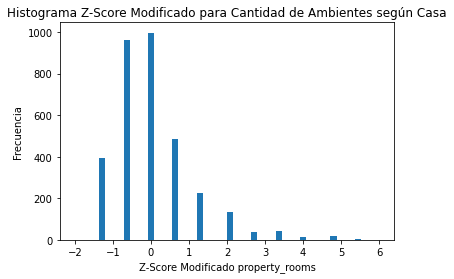

In [1507]:
plt.hist(df_casa.zm_rooms, bins=50, range=(-2,6))
plt.title('Histograma Z-Score Modificado para Cantidad de Ambientes según Casa')
plt.xlabel('Z-Score Modificado property_rooms')
plt.ylabel('Frecuencia')
plt.show()

###### PH

In [1508]:
mediana_room_ph = np.nanmedian(df_ph.property_rooms)
MAD = np.nanmedian(np.absolute(df_ph.property_rooms-mediana_room_ph))
df_ph['zm_rooms']=(df_ph.property_rooms - mediana_room_ph)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [1509]:
df_ph[(df_ph['zm_rooms']>3.5)].head()

latitud   longitud         place_l2           place_l3  \
275967 -34.612030 -58.415660  Capital Federal            Almagro   
292167 -34.616487 -58.371596  Capital Federal          San Telmo   
109271 -34.603269 -58.432058  Capital Federal       Villa Crespo   
285221 -34.638435 -58.369711  Capital Federal           Barracas   
58763  -34.649049 -58.482944  Capital Federal  Parque Avellaneda   

                 place_l4 property_type  property_rooms  property_bedrooms  \
275967            Almagro            PH            12.0                8.0   
292167          San Telmo            PH            24.0               22.0   
109271       Villa Crespo            PH            10.0                6.0   
285221           Barracas            PH            15.0               13.0   
58763   Parque Avellaneda            PH             9.0                6.0   

        property_surface_total  property_surface_covered  property_price  \
275967                   315.0                     230.0        399000.0   
292167                   800.0                     650.0        350000.0   
109271                   315.0                     216.0        355000.0   
285221                   524.0                     261.0        335000.0   
58763                    276.0                     220.0        190000.0   

          z_rooms  zm_rooms  
275967   5.883145    6.0705  
292167  14.166437   14.1645  
109271   4.502596    4.7215  
285221   7.953968    8.0940  
58763    3.812322    4.0470

In [1510]:
df_ph[(df_ph['zm_rooms']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms]
Index: []

Nuevamente evidenciamos cantidades.

In [1511]:
df_ph[(df_ph['zm_rooms']>3.5)].shape[0]

56

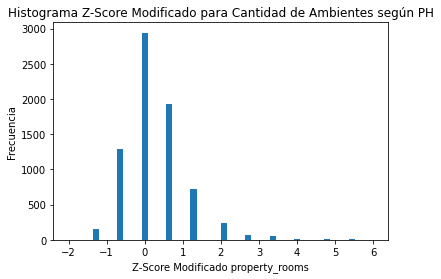

In [1512]:
plt.hist(df_ph.zm_rooms, bins=50, range=(-2,6))
plt.title('Histograma Z-Score Modificado para Cantidad de Ambientes según PH')
plt.xlabel('Z-Score Modificado property_rooms')
plt.ylabel('Frecuencia')
plt.show()

##### Características

Del análisis de los 3 gráficos previamente presentados, podemos concluir que, puesto que existe una gran masa conjunta de observaciones que superan el límite superior del tercer cuartil, podríamos decir que los outliers en cuestión son del tipo colectivo.

##### Conclusiones

En cuanto a la variable property_room previamente analizada, pudimos observar que presento una no menor cantidad de valores atipicos entre sus registros. Como pudimos ver, es de acuerdo al metodo utilizado que varia la cantidad detectada. 

Generalizando, nuestro dataset presenta repetidos valores notoriamente altos en relacion a la cantidad de cuartos.

#### Property bedrooms

 ##### Box plot


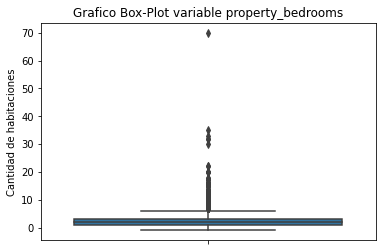

In [ ]:
sns.boxplot(y=df.property_bedrooms)
plt.title('Grafico Box-Plot variable property_bedrooms')
plt.ylabel('Cantidad de habitaciones')
plt.show()

In [ ]:
Q1_property_bedrooms=df.describe().get("property_bedrooms").get("25%")
Q3_property_bedrooms=df.describe().get("property_bedrooms").get("75%")

print("El valor de Q1 es:", Q1_property_bedrooms)
print("El valor de Q3 es:", Q3_property_bedrooms)

IQR_property_bedrooms=Q3_property_bedrooms-Q1_property_bedrooms

out_inf=Q1_property_bedrooms-1.5*IQR_property_bedrooms
out_sup=Q3_property_bedrooms+1.5*IQR_property_bedrooms
print("El limite inferior del Q1 es:", out_inf)
print("El limite superior del Q3 es:", out_sup)

El valor de Q1 es: 1.0
El valor de Q3 es: 3.0
El limite inferior del Q1 es: -2.0
El limite superior del Q3 es: 6.0


##### Z-Score

In [ ]:
media_bedrooms=np.mean(df.property_bedrooms)
std_bedrooms=np.std(df.property_bedrooms)
df['z_bedrooms']=(df.property_bedrooms - media_bedrooms)/std_bedrooms

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [ ]:
df[df['z_bedrooms']>3].head()

latitud   longitud         place_l2          place_l3  \
403885 -34.621092 -58.376189  Capital Federal         San Telmo   
150885 -34.642037 -58.438995  Capital Federal  Parque Chacabuco   
204107 -34.590275 -58.383917  Capital Federal          Recoleta   
275967 -34.612030 -58.415660  Capital Federal           Almagro   
398724 -34.604668 -58.396573  Capital Federal         Balvanera   

                place_l4 property_type  property_rooms  property_bedrooms  \
403885         San Telmo          Casa             8.0                6.0   
150885  Parque Chacabuco  Departamento            35.0               35.0   
204107          Recoleta  Departamento             6.0                6.0   
275967           Almagro            PH            12.0                8.0   
398724         Balvanera  Departamento             8.0                7.0   

        property_surface_total  property_surface_covered  property_price  \
403885                   511.0                     511.0        790000.0   
150885                    37.0                      33.0         67000.0   
204107                   379.0                     379.0       1150000.0   
275967                   315.0                     230.0        399000.0   
398724                   247.0                     232.0        360000.0   

          z_rooms  zm_rooms  z_bedrooms  
403885   3.602309    3.3725    3.609858  
150885  22.435777   21.5840   29.245526  
204107   2.207238    2.0235    3.609858  
275967   6.392453    6.0705    5.377835  
398724   3.602309    3.3725    4.493846

In [ ]:
df[df['z_bedrooms']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms]
Index: []

Contabilizamos cantidades registradas

In [ ]:
df[df['z_bedrooms']>3].shape[0]

438

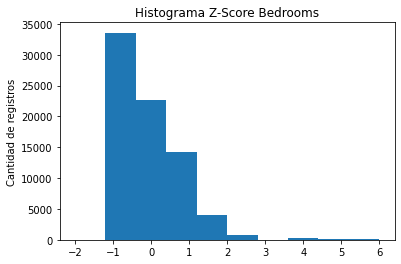

In [ ]:
plt.hist(df.z_bedrooms, bins=10, range=(-2,6))
plt.title('Histograma Z-Score Bedrooms')
plt.ylabel('Cantidad de registros')
plt.show()

##### Z-Score Modificado

In [ ]:
mediana_bedroom=np.nanmedian(df.property_bedrooms)
MAD=np.nanmedian(np.absolute(df.property_bedrooms-mediana_bedroom))

df['zm_bedrooms']=(df.property_bedrooms - mediana_bedroom)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [ ]:
df[(df['zm_bedrooms']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
150885 -34.642037 -58.438995  Capital Federal  Parque Chacabuco   
275967 -34.612030 -58.415660  Capital Federal           Almagro   
292167 -34.616487 -58.371596  Capital Federal         San Telmo   
243306 -34.573683 -58.470382  Capital Federal          Belgrano   
282796 -34.604522 -58.400579  Capital Federal         Balvanera   

                place_l4 property_type  property_rooms  property_bedrooms  \
150885  Parque Chacabuco  Departamento            35.0               35.0   
275967           Almagro            PH            12.0                8.0   
292167         San Telmo            PH            24.0               22.0   
243306          Belgrano          Casa            11.0                9.0   
282796         Balvanera  Departamento            10.0                9.0   

        property_surface_total  property_surface_covered  property_price  \
150885                    37.0                      33.0         67000.0   
275967                   315.0                     230.0        399000.0   
292167                   800.0                     650.0        350000.0   
243306                   537.0                     537.0       1120000.0   
282796                   294.0                     160.0        199000.0   

          z_rooms  zm_rooms  z_bedrooms  zm_bedrooms  
150885  22.435777   21.5840   29.245526      22.2585  
275967   6.392453    6.0705    5.377835       4.0470  
292167  14.762883   14.1645   17.753675      13.4900  
243306   5.694917    5.3960    6.261823       4.7215  
282796   4.997381    4.7215    6.261823       4.7215

In [ ]:
df[(df['zm_bedrooms']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms]
Index: []

Nuevamente contabilizamos cantidades

In [ ]:
df[(df['zm_bedrooms']>3.5)].shape[0]

145

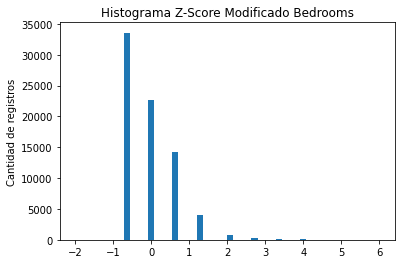

In [ ]:
plt.hist(df.zm_bedrooms, bins=50, range=(-2,6))
plt.title('Histograma Z-Score Modificado Bedrooms')
plt.ylabel('Cantidad de registros')
plt.show()

##### Características

Del análisis de los 3 gráficos previamente presentados, podemos concluir que, puesto que existe una gran masa conjunta de observaciones atípicas y una singular -también atípica- lejana a la masa en cuestión- podríamos decir que los outliers son del tipo colectivo (para la masa de observaciones cerca del máximo para el tercer cuartil) y global (para la singular por encima del resto de las observaciones).

##### Conclusiones

Del analisis realizado a la variables property_bedroom notamos una pequeña porcion notablemente alejada del resto de los registros, la cual visibilizamos rapidamente como oulier. 

Por otro lado, cabe destacar que de un analisis mas detallado tambien salen nuevos outliers. Por mas que estos no se encuentren tan alejados, se salen de las reglas preestablecidas por los metodos que utilizamos para su deteccion. 

Nuevamente, encontramos outliers relacionados a una cantidad excesiva de habitaciones.

#### Property price

##### Box plot

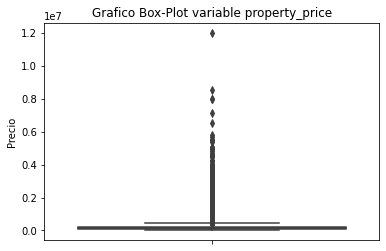

In [ ]:
sns.boxplot(y=df.property_price)
plt.title('Grafico Box-Plot variable property_price')
plt.ylabel('Precio')
plt.show()

In [ ]:
Q1_property_price=df.describe().get("property_price").get("25%")
Q3_property_price=df.describe().get("property_price").get("75%")

print("El valor de Q1 es:", Q1_property_price)
print("El valor de Q3 es:", Q3_property_price)

IQR_property_price=Q3_property_price-Q1_property_price

out_inf=Q1_property_price-1.5*IQR_property_price
out_sup=Q3_property_price+1.5*IQR_property_price
print("El limite inferior del Q1 es:", out_inf)
print("El limite superior del Q3 es:", out_sup)

El valor de Q1 es: 95000.0
El valor de Q3 es: 238000.0
El limite inferior del Q1 es: -119500.0
El limite superior del Q3 es: 452500.0


##### Z-Score

In [ ]:
media_price=np.mean(df.property_price)
std_price=np.std(df.property_price)
df['z_price']=(df.property_price - media_price)/std_price

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [ ]:
df[df['z_price']>3].head()

latitud   longitud         place_l2       place_l3       place_l4  \
155779 -34.566853 -58.446764  Capital Federal       Belgrano       Belgrano   
302892 -34.613984 -58.391485  Capital Federal       Belgrano       Belgrano   
145697 -34.573079 -58.419203  Capital Federal        Palermo        Palermo   
86685  -34.612639 -58.361888  Capital Federal  Puerto Madero  Puerto Madero   
326709 -34.548097 -58.466330  Capital Federal          Nuñez          Nuñez   

       property_type  property_rooms  property_bedrooms  \
155779  Departamento             5.0                4.0   
302892  Departamento             6.0                4.0   
145697  Departamento             6.0                3.0   
86685   Departamento             4.0                3.0   
326709  Departamento             5.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
155779                   380.0                     380.0       1300000.0   
302892                   390.0                     390.0       1290000.0   
145697                   400.0                     400.0       2100000.0   
86685                    253.0                     253.0       1990000.0   
326709                   268.0                     268.0       1600000.0   

         z_rooms  zm_rooms  z_bedrooms  zm_bedrooms   z_price  
155779  1.509702    1.3490    1.841880       1.3490  3.476457  
302892  2.207238    2.0235    1.841880       1.3490  3.444082  
145697  2.207238    2.0235    0.957892       0.6745  6.066431  
86685   0.812166    0.6745    0.957892       0.6745  5.710310  
326709  1.509702    1.3490    0.957892       0.6745  4.447697

In [ ]:
df[df['z_price']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price]
Index: []

Contabilizamos outliers

In [ ]:
df[df['z_price']>3].shape[0]

1375

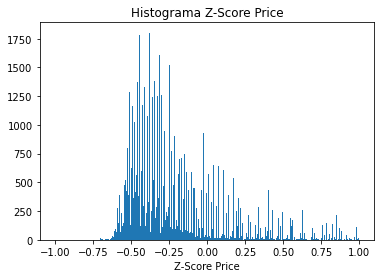

In [ ]:
plt.hist(df.z_price, bins=400, range=(-1,1))
plt.title('Histograma Z-Score Price')
plt.xlabel('Z-Score Price')
plt.show()

##### Z-Score Modificado

In [ ]:
mediana_price=np.nanmedian(df.property_price)
MAD=np.nanmedian(np.absolute(df.property_price-mediana_price))

df['zm_price']=(df.property_price - mediana_price)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [ ]:
df[(df['zm_price']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
19975  -34.618084 -58.359912  Capital Federal     Puerto Madero   
387643 -34.612009 -58.475824  Capital Federal  Villa del Parque   
403885 -34.621092 -58.376189  Capital Federal         San Telmo   
165091 -34.574988 -58.420192  Capital Federal           Palermo   
408105 -34.573623 -58.421204  Capital Federal           Palermo   

                place_l4 property_type  property_rooms  property_bedrooms  \
19975      Puerto Madero  Departamento             2.0                1.0   
387643  Villa del Parque          Casa             5.0                4.0   
403885         San Telmo          Casa             8.0                6.0   
165091           Palermo  Departamento             3.0                2.0   
408105           Palermo  Departamento             4.0                3.0   

        property_surface_total  property_surface_covered  property_price  \
19975                     70.0                      65.0        450000.0   
387643                   320.0                     250.0        450000.0   
403885                   511.0                     511.0        790000.0   
165091                   100.0                      95.0        600000.0   
408105                   140.0                     106.0        798000.0   

         z_rooms  zm_rooms  z_bedrooms  zm_bedrooms   z_price  zm_price  
19975  -0.582906   -0.6745   -0.810085      -0.6745  0.724609  3.539711  
387643  1.509702    1.3490    1.841880       1.3490  0.724609  3.539711  
403885  3.602309    3.3725    3.609858       2.6980  1.825348  7.472723  
165091  0.114630    0.0000    0.073903       0.0000  1.210229  5.274863  
408105  0.812166    0.6745    0.957892       0.6745  1.851248  7.565264

In [ ]:
df[(df['zm_price']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price, zm_price]
Index: []

Contabilizamos outliers resultantes del z score modificado

In [ ]:
df[(df['zm_price']>3.5)].shape[0]

6896

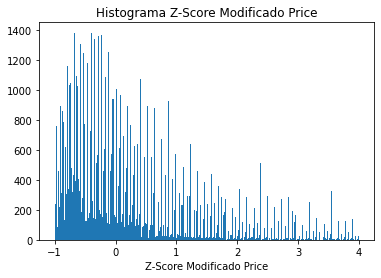

In [ ]:
plt.hist(df.zm_price, bins=300, range=(-1,4))
plt.title('Histograma Z-Score Modificado Price')
plt.xlabel('Z-Score Modificado Price')
plt.show()

##### Características

Nuevamente, concluimos que al existir una gran masa conjunta de observaciones atípicas y una singular -también atípica- lejana a la masa en cuestión- podríamos decir que los outliers son del tipo colectivo (para la masa de observaciones cerca del máximo para el tercer cuartil) y global (para la observación singular por encima del resto de las observaciones).

##### Conclusiones

Como pudimos observar, nuevamente pudimos ver que contamos con una minoria notoriamente alejada de los demas puntos, la cual definimos rapidamente como outliers. 

Por otro lado, mas alla de que hay una gran cantidad que sobrepasa el limite superior previamente definido, la cual es bastante mas superior en relaciona las variables anteriores, todos estos registros se encuentran uno a continuacion del otro. Tendremos presente esta observacion al momento de hacer el analisis multivariado con las demas variables.

#### Property surface covered

##### Box plot

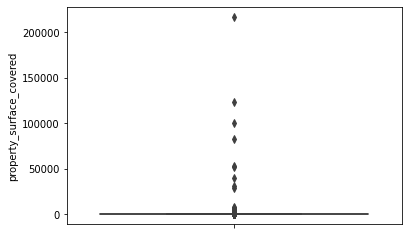

In [ ]:
sns.boxplot(y=df.property_surface_covered)
plt.show()

In [ ]:
Q1_property_surface_covered=df.describe().get("property_surface_covered").get("25%")
Q3_property_surface_covered=df.describe().get("property_surface_covered").get("75%")

print("El valor de Q1 es:", Q1_property_surface_covered)
print("El valor de Q3 es:", Q3_property_surface_covered)

IQR_property_surface_covered=Q3_property_surface_covered-Q1_property_surface_covered

out_inf=Q1_property_surface_covered-1.5*IQR_property_surface_covered
out_sup=Q3_property_surface_covered+1.5*IQR_property_surface_covered
print("El limite inferior del Q1 es:", out_inf)
print("El limite superior del Q3 es:", out_sup)

El valor de Q1 es: 40.0
El valor de Q3 es: 89.0
El limite inferior del Q1 es: -33.5
El limite superior del Q3 es: 162.5


##### Z-Score

In [ ]:
media_surface_covered=np.mean(df.property_surface_covered)
std_surface_covered=np.std(df.property_surface_covered)
df['z_surface_covered']=(df.property_surface_covered - media_surface_covered)/std_surface_covered

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [ ]:
df[df['z_surface_covered']>3].head()

latitud   longitud         place_l2      place_l3      place_l4  \
352883 -34.550093 -58.483034  Capital Federal      Saavedra      Saavedra   
459849 -34.628282 -58.437803  Capital Federal     Caballito     Caballito   
72316  -34.578917 -58.429373  Capital Federal       Palermo       Palermo   
372779 -34.555278 -58.459786  Capital Federal      Belgrano      Belgrano   
106598 -34.587320 -58.401556  Capital Federal  Barrio Norte  Barrio Norte   

       property_type  property_rooms  property_bedrooms  \
352883  Departamento             1.0                1.0   
459849  Departamento             3.0                2.0   
72316   Departamento             2.0                1.0   
372779  Departamento             4.0                3.0   
106598  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
352883                 29064.0                   29064.0         87400.0   
459849                  7720.0                    5970.0        167894.0   
72316                  61130.0                   53030.0        225000.0   
372779                100068.0                  100051.0        420000.0   
106598                 56740.0                   52540.0        175000.0   

         z_rooms  zm_rooms  z_bedrooms  zm_bedrooms   z_price  zm_price  \
352883 -1.280442   -1.3490   -0.810085      -0.6745 -0.449297 -0.654731   
459849  0.114630    0.0000    0.073903       0.0000 -0.188701  0.276398   
72316  -0.582906   -0.6745   -0.810085      -0.6745 -0.003822  0.936982   
372779  0.812166    0.6745    0.957892       0.6745  0.627485  3.192680   
106598 -0.582906   -0.6745   -0.810085      -0.6745 -0.165695  0.358598   

        z_surface_covered  
352883          26.734330  
459849           5.425392  
72316           48.847867  
372779          92.234356  
106598          48.395742

Contabilizamos

In [ ]:
df[df['z_surface_covered']>3].shape[0]

25

In [ ]:
df[df['z_surface_covered']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price, zm_price, z_surface_covered]
Index: []

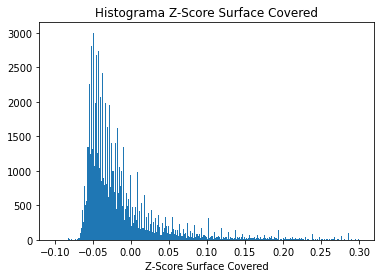

In [ ]:
plt.hist(df.z_surface_covered, bins=300, range=(-0.1,0.3))
plt.title('Histograma Z-Score Surface Covered')
plt.xlabel('Z-Score Surface Covered')
plt.show()

##### Z-Score Modificado

In [ ]:
mediana_surface_covered=np.nanmedian(df.property_surface_covered)
MAD=np.nanmedian(np.absolute(df.property_surface_covered-mediana_surface_covered))

df['zm_surface_covered']=(df.property_surface_covered - mediana_surface_covered)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [ ]:
df[(df['zm_surface_covered']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
387643 -34.612009 -58.475824  Capital Federal  Villa del Parque   
403885 -34.621092 -58.376189  Capital Federal         San Telmo   
266776 -34.616105 -58.430122  Capital Federal         Caballito   
155779 -34.566853 -58.446764  Capital Federal          Belgrano   
424845 -34.643476 -58.463102  Capital Federal            Flores   

                place_l4 property_type  property_rooms  property_bedrooms  \
387643  Villa del Parque          Casa             5.0                4.0   
403885         San Telmo          Casa             8.0                6.0   
266776         Caballito            PH             5.0                4.0   
155779          Belgrano  Departamento             5.0                4.0   
424845            Flores          Casa             5.0                4.0   

        property_surface_total  property_surface_covered  property_price  \
387643                   320.0                     250.0        450000.0   
403885                   511.0                     511.0        790000.0   
266776                   330.0                     270.0        499000.0   
155779                   380.0                     380.0       1300000.0   
424845                   238.0                     238.0        189000.0   

         z_rooms  zm_rooms  z_bedrooms  zm_bedrooms   z_price   zm_price  \
387643  1.509702    1.3490    1.841880        1.349  0.724609   3.539711   
403885  3.602309    3.3725    3.609858        2.698  1.825348   7.472723   
266776  1.509702    1.3490    1.841880        1.349  0.883245   4.106527   
155779  1.509702    1.3490    1.841880        1.349  3.476457  13.372241   
424845  1.509702    1.3490    1.841880        1.349 -0.120371   0.520546   

        z_surface_covered  zm_surface_covered  
387643           0.147522            6.166857  
403885           0.388348           14.549929  
266776           0.165976            6.809238  
155779           0.267473           10.342333  
424845           0.136449            5.781429

In [ ]:
df[(df['zm_surface_covered']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price, zm_price, z_surface_covered, zm_surface_covered]
Index: []

Contabilizamos outliers

In [ ]:
df[(df['zm_surface_covered']>3.5)].shape[0]

6069

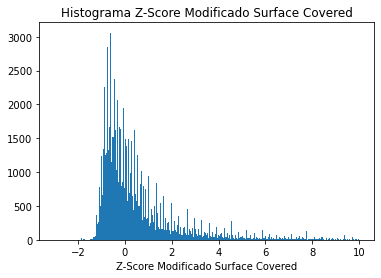

In [ ]:
plt.hist(df.zm_surface_covered, bins=300, range=(-3,10))
plt.title('Histograma Z-Score Modificado Surface Covered')
plt.xlabel('Z-Score Modificado Surface Covered')
plt.show()

##### Características

Nuevamente, concluimos que al existir una gran masa conjunta de observaciones atípicas y una singular -también atípica- lejana a la masa en cuestión- podríamos decir que los outliers son del tipo colectivo (para la masa de observaciones cerca del máximo para el tercer cuartil) y global (para la observación singular por encima del resto de las observaciones).

##### Conclusiones

Como pudimos apreciar, obtuvimos gran cantidad de valores que sobrepasaron el limite superior visualizado en el grafico de box-plot. A su vez, podemos ver el paralelismo con el histograma, el cual presenta una gran desviacion hacia la izquierda hasta valores cercanos al 10, en donde de todas formas disminuye notoriamente de valor.

En particular, pudimos ver como para esta variable se observaron valores puntuales claramente altos, y realizando un analisis un poco mas profundo utilizando z-score y z-score modificado notamos que contamos mas cantidad de estos, aunque se encuentran bastante mas cercanos a los valores esperados explicitados al inicio.

#### Property surface total

##### Box plot

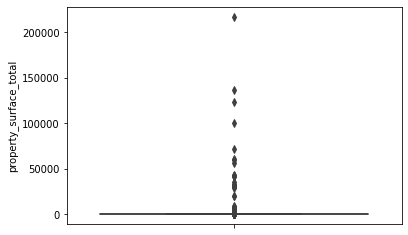

In [ ]:
sns.boxplot(y=df.property_surface_total)
plt.show()

In [ ]:
Q1_property_surface_total=df.describe().get("property_surface_total").get("25%")
Q3_property_surface_total=df.describe().get("property_surface_total").get("75%")

print("El valor de Q1 es:", Q1_property_surface_total)
print("El valor de Q3 es:", Q3_property_surface_total)

IQR_property_surface_total=Q3_property_surface_total-Q1_property_surface_total

out_inf=Q1_property_surface_total-1.5*IQR_property_surface_total
out_sup=Q3_property_surface_total+1.5*IQR_property_surface_total
print("El limite inferior del Q1 es:", out_inf)
print("El limite superior del Q3 es:", out_sup)

El valor de Q1 es: 45.0
El valor de Q3 es: 105.0
El limite inferior del Q1 es: -45.0
El limite superior del Q3 es: 195.0


##### Z-Score

In [ ]:
media_surface_total=np.mean(df.property_surface_total)
std_surface_total=np.std(df.property_surface_total)
df['z_surface_total']=(df.property_surface_total - media_surface_total)/std_surface_total

Estudiamos si existen datos para el método de Z-Score utilizando la regla de oro (|Z|>3).

In [ ]:
df[df['z_surface_total']>3].head()

latitud   longitud         place_l2         place_l3  \
370917 -34.571747 -58.422612  Capital Federal          Palermo   
352883 -34.550093 -58.483034  Capital Federal         Saavedra   
189057 -31.459563 -64.407188  Capital Federal  Capital Federal   
459849 -34.628282 -58.437803  Capital Federal        Caballito   
72316  -34.578917 -58.429373  Capital Federal          Palermo   

               place_l4 property_type  property_rooms  property_bedrooms  \
370917          Palermo  Departamento             4.0                3.0   
352883         Saavedra  Departamento             1.0                1.0   
189057  Capital Federal          Casa             4.0                3.0   
459849        Caballito  Departamento             3.0                2.0   
72316           Palermo  Departamento             2.0                1.0   

        property_surface_total  property_surface_covered  property_price  \
370917                 42110.0                     222.0       1910920.0   
352883                 29064.0                   29064.0         87400.0   
189057                  4200.0                     450.0        850000.0   
459849                  7720.0                    5970.0        167894.0   
72316                  61130.0                   53030.0        225000.0   

         z_rooms  zm_rooms  z_bedrooms  zm_bedrooms   z_price   zm_price  \
370917  0.812166    0.6745    0.957892       0.6745  5.454291  20.439170   
352883 -1.280442   -1.3490   -0.810085      -0.6745 -0.449297  -0.654731   
189057  0.812166    0.6745    0.957892       0.6745  2.019596   8.166784   
459849  0.114630    0.0000    0.073903       0.0000 -0.188701   0.276398   
72316  -0.582906   -0.6745   -0.810085      -0.6745 -0.003822   0.936982   

        z_surface_covered  zm_surface_covered  z_surface_total  
370917           0.121686            5.267524        32.119577  
352883          26.734330          931.645095        22.141889  
189057           0.332063           12.590667         3.125696  
459849           5.425392          189.887810         5.817821  
72316           48.847867         1701.410190        46.666230

In [ ]:
df[df['z_surface_total']<-3].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price, zm_price, z_surface_covered, zm_surface_covered, z_surface_total]
Index: []

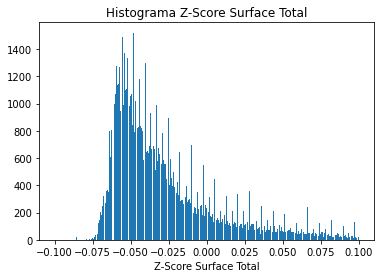

In [ ]:
plt.hist(df.z_surface_total, bins=300, range=(-0.1,0.1))
plt.title('Histograma Z-Score Surface Total')
plt.xlabel('Z-Score Surface Total')
plt.show()

##### Z-Score Modificado

In [ ]:
mediana_surface_total=np.nanmedian(df.property_surface_total)
MAD=np.nanmedian(np.absolute(df.property_surface_total-mediana_surface_total))

df['zm_surface_total']=(df.property_surface_total - mediana_surface_total)*0.6745/MAD

Estudiamos si existen datos para el método de Z-Score Modificado utilizando la regla de oro (|Z|>3.5).

In [ ]:
df[(df['zm_surface_total']>3.5)].head()

latitud   longitud         place_l2          place_l3  \
387643 -34.612009 -58.475824  Capital Federal  Villa del Parque   
403885 -34.621092 -58.376189  Capital Federal         San Telmo   
266776 -34.616105 -58.430122  Capital Federal         Caballito   
155779 -34.566853 -58.446764  Capital Federal          Belgrano   
424845 -34.643476 -58.463102  Capital Federal            Flores   

                place_l4 property_type  property_rooms  property_bedrooms  \
387643  Villa del Parque          Casa             5.0                4.0   
403885         San Telmo          Casa             8.0                6.0   
266776         Caballito            PH             5.0                4.0   
155779          Belgrano  Departamento             5.0                4.0   
424845            Flores          Casa             5.0                4.0   

        property_surface_total  property_surface_covered  ...   z_rooms  \
387643                   320.0                     250.0  ...  1.509702   
403885                   511.0                     511.0  ...  3.602309   
266776                   330.0                     270.0  ...  1.509702   
155779                   380.0                     380.0  ...  1.509702   
424845                   238.0                     238.0  ...  1.509702   

        zm_rooms  z_bedrooms  zm_bedrooms   z_price   zm_price  \
387643    1.3490    1.841880        1.349  0.724609   3.539711   
403885    3.3725    3.609858        2.698  1.825348   7.472723   
266776    1.3490    1.841880        1.349  0.883245   4.106527   
155779    1.3490    1.841880        1.349  3.476457  13.372241   
424845    1.3490    1.841880        1.349 -0.120371   0.520546   

        z_surface_covered  zm_surface_covered  z_surface_total  \
387643           0.147522            6.166857         0.158240   
403885           0.388348           14.549929         0.304319   
266776           0.165976            6.809238         0.165888   
155779           0.267473           10.342333         0.204129   
424845           0.136449            5.781429         0.095526   

        zm_surface_total  
387643           6.87990  
403885          12.03308  
266776           7.14970  
155779           8.49870  
424845           4.66754  

[5 rows x 21 columns]

In [ ]:
df[(df['zm_surface_total']<-3.5)].head()

Empty DataFrame
Columns: [latitud, longitud, place_l2, place_l3, place_l4, property_type, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price, z_rooms, zm_rooms, z_bedrooms, zm_bedrooms, z_price, zm_price, z_surface_covered, zm_surface_covered, z_surface_total, zm_surface_total]
Index: []

[0 rows x 21 columns]

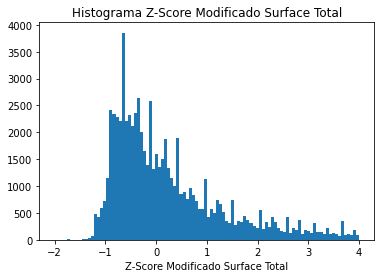

In [ ]:
plt.hist(df.zm_surface_total, bins=100, range=(-2,4))
plt.title('Histograma Z-Score Modificado Surface Total')
plt.xlabel('Z-Score Modificado Surface Total')
plt.show()

##### Características

Nuevamente, concluimos que al existir una gran masa conjunta de observaciones atípicas y una singular -también atípica- lejana a la masa en cuestión- podríamos decir que los outliers son del tipo colectivo (para la masa de observaciones cerca del máximo para el tercer cuartil) y global (para la observación singular por encima del resto de las observaciones).

##### Conclusiones

Como podemos ver, en esta variable tenemos el grafico de box-plot muy pequeño, dado que los puntos expuestos se encuentran muy alejados de las cercanias de este. Por otro lado, esto nos evidencia mas que estas visualizaciones son valores bastante atipicos para esta variable. 

Por otro lado, nuevamente en el grafico del histograma podemos ver que esta claramente desplazado hacia la derecha. Esto tiene sentido con los resultados obtenidos con la famosa "regla de oro".

### Outliers multivariados

---

Para el análisis de outliers de tipo multivariados estaremos utilizando el método de Mahalanobis el cual nos brinda información respecto de la distancia de las observaciones agrupando las similares en clusters, evidenciando así los puntos aislados que pasaremos a considerar como valores atípicos.

Por último, podremos destacar cuáles son las características de los valores en cuestión pudiendo clasificar los mismos en: global, contextual y colectivo.

#### Property surface total vs Price



##### Scatter


En un primer lugar lo que vamos a hacer sera dimensionar la relacion entre las variables property surface total vs price en un scatter plot.

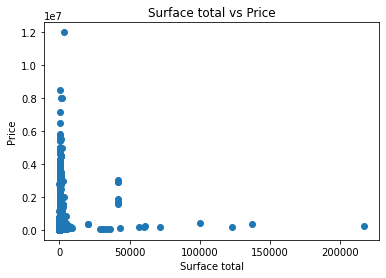

In [ ]:
plt.scatter(mahal.property_surface_total,mahal.property_price)
plt.title('Surface total vs Price')
plt.xlabel('Surface total')
plt.ylabel('Price')
plt.show()

##### Mahalanobis

A continuacion lo que haremos sera el analisis entre ambas variables nuevamente, con la salvedad de que ahora lo que utilizaremos sera la distancia de mahalanobis, ya que nos informa de los resultados de manera mas precisa.

In [ ]:
X = mahal[['property_surface_total','property_price']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_sfto_prc'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...  zm_rooms  \
92828                    113.0                      97.0  ...    0.6745   
19975                     70.0                      65.0  ...   -0.6745   
266756                    33.0                      30.0  ...   -1.3490   
454638                    30.0                      30.0  ...   -1.3490   
409114                    40.0                      40.0  ...   -1.3490   

        z_bedrooms  zm_bedrooms   z_price  zm_price  z_surface_covered  \
92828     0.957892       0.6745  0.200139  1.665746           0.006348   
19975    -0.810085      -0.6745  0.724609  3.539711          -0.023179   
266756   -0.810085      -0.6745 -0.482180 -0.772224          -0.055473   
454638   -0.810085      -0.6745 -0.521817 -0.913847          -0.055473   
409114   -0.810085      -0.6745 -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  
92828             1.252643        -0.000075           1.29504        0.045108  
19975             0.224833        -0.032962           0.13490        0.593603  
266756           -0.899333        -0.061260          -0.86336        0.253869  
454638           -0.899333        -0.063554          -0.94430        0.297378  
409114           -0.578143        -0.055906          -0.67450        0.247922  

[5 rows x 22 columns]

In [ ]:
np.sort(mahal.mahal_sfto_prc)

array([3.05486662e-06, 8.94228310e-06, 1.13833221e-05, ...,
       8.46874165e+03, 1.04880326e+04, 2.63625784e+04])

A continuacion lo que haremos sera establecer un umbral para el cual los valores puntuales que se encuentran por fuera de este seran considerados outliers. Para definir estas distancias consideramos lo calculado con Mahalanobis, y procedemos a colorearlas en el siguiente grafico.

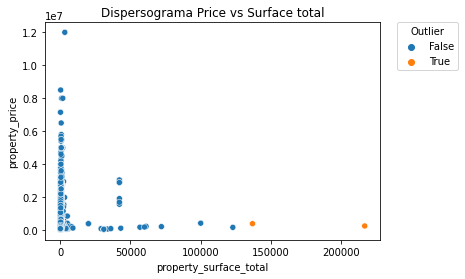

In [ ]:
umbral=10000
mahal[mahal['mahal_sfto_prc']>umbral]

es_outlier = (mahal['mahal_sfto_prc'] > umbral)
sns.scatterplot(x=mahal.property_surface_total,y=mahal.property_price, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Price vs Surface total')
plt.show()

##### Caracteristicas

Podemos visualizar que los valores que se encuentran particularmente alejados de la masa de observaciones caben dentro de la clasificación de outliers globales.

##### Conclusiones

Podemos notar que la mayor cantidad de valores cumple que mientras menor sea la superficie total mas alto sera el precio de la propiedad. Tenemos algunas excepciones en donde la superficie crece pero no se cumple el incremento del precio, lo cual nos resulta bastante extraño. Procedemos a determinarlos como valores atipicos. 

#### Property rooms vs Property bedrooms

Una de las observaciones que podríamos realizar es que no puede existir una diferencia de más de una unidad entre ambientes y habitaciones, puesto que si un departamento se vende como "3 ambientes" eso implica que tiene 2 habitaciones. En esa línea, podríamos estudiar las diferencias existentes entre las observaciones definidas como outliers por el boxplot previamente graficado:

In [ ]:
deptos = df[(df.property_rooms >= out_sup) & (df.property_type == 'Departamento')]

(deptos.property_rooms - deptos.property_bedrooms).unique()

array([ 3.,  0.,  4.,  1.,  6.,  5.,  2., 14.,  7., 28., 18., 19.])

##### Scatter

Nuevamente realizamos un grafico para observar la relacion entre ambas variables a analizar.

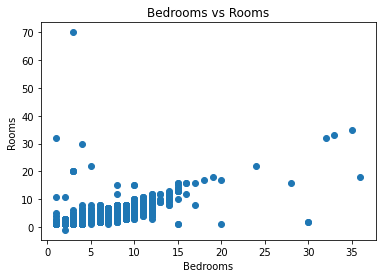

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_bedrooms)
plt.title('Bedrooms vs Rooms')
plt.xlabel('Bedrooms')
plt.ylabel('Rooms')
plt.show()

##### Mahalanobis

Nuevamente calculamos la distancia de Mahalanobis, la cual utilizaremos luego para determinar el umbral para los valores atipicos.

In [ ]:
X = mahal[['property_rooms','property_bedrooms']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_bdro'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

latitud   longitud         place_l2       place_l3       place_l4  \
92828  -34.622385 -58.448886  Capital Federal      Caballito      Caballito   
19975  -34.618084 -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -34.601159 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -34.605542 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -34.593266 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  property_rooms  property_bedrooms  \
92828   Departamento             4.0                3.0   
19975   Departamento             2.0                1.0   
266756  Departamento             1.0                1.0   
454638  Departamento             1.0                1.0   
409114  Departamento             1.0                1.0   

        property_surface_total  property_surface_covered  ...  z_bedrooms  \
92828                    113.0                      97.0  ...    0.957892   
19975                     70.0                      65.0  ...   -0.810085   
266756                    33.0                      30.0  ...   -0.810085   
454638                    30.0                      30.0  ...   -0.810085   
409114                    40.0                      40.0  ...   -0.810085   

        zm_bedrooms   z_price  zm_price  z_surface_covered  \
92828        0.6745  0.200139  1.665746           0.006348   
19975       -0.6745  0.724609  3.539711          -0.023179   
266756      -0.6745 -0.482180 -0.772224          -0.055473   
454638      -0.6745 -0.521817 -0.913847          -0.055473   
409114      -0.6745 -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  \
92828             1.252643        -0.000075           1.29504        0.045108   
19975             0.224833        -0.032962           0.13490        0.593603   
266756           -0.899333        -0.061260          -0.86336        0.253869   
454638           -0.899333        -0.063554          -0.94430        0.297378   
409114           -0.578143        -0.055906          -0.67450        0.247922   

        mahal_ro_bdro  
92828        0.946904  
19975        0.713806  
266756       2.134528  
454638       2.134528  
409114       2.134528  

[5 rows x 23 columns]

Nuevamente ordenamos los valores obtenidos con el metodo.

In [ ]:
np.sort(mahal.mahal_ro_bdro)

array([2.02550088e-02, 2.02550088e-02, 2.02550088e-02, ...,
       2.28777837e+03, 3.02568684e+03, 1.42075436e+04])

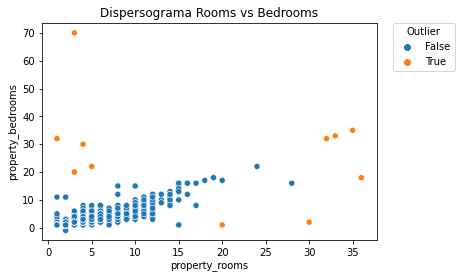

In [ ]:
umbral=700
mahal[mahal['mahal_ro_bdro']>umbral]

es_outlier = (mahal['mahal_ro_bdro'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_bedrooms, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Bedrooms')
plt.show()

##### Caracteristicas

Notamos que estamos en presencia de outliers en su mayoría globales, con la particularidad de que tenemos algunos casos de valores atípicos colectivos en las cercanías del rango equivalente a 30 respecto del eje `property_bedrooms`.

Adicionalmente, cabe destacar que hay dos valores particularmente alejados. Siguiendo esta línea, llegamos a la conclusión de que estamos en presencia de outliers globales.

##### Conclusiones

Luego de observar la distribucion entre ambas variables determinamos un umbral puntual que coloree los valores mas alejados a la concentracion principal.

De un analisis podemos notar que a medida que se incrementa la cantidad de habitaciones, tambien lo hace la cantidad de baños, aunque en una menor proporcion que la anterior. 

Teniendo en consideracion esto, es que nos llaman la atencion los valores que se encuentran en los extremos superior izquierdo e inferior derecho. Aunque podria suceder que una propiedad tenga cierta desproporcion en estas habitaciones, no es un valor que estemos acostumbrados a esperar. Concluimos coloreandolo como valor atipico.

#### Property rooms vs Property surface total

##### Scatter


Exponemos la relacion entre las variables rooms vs suface total.

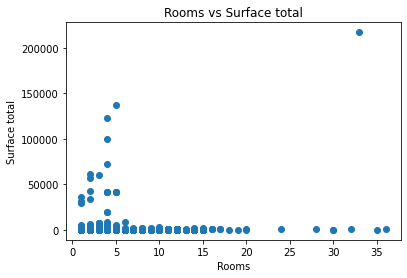

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_surface_total)
plt.title('Rooms vs Surface total')
plt.xlabel('Rooms')
plt.ylabel('Surface total')
plt.show()

##### Mahalanobis

Para poder determinar concretamente estos valores atipicos, nos ayudamos con el calculo de la distancia de mahalanobis para cada una de las observaciones presentes.

In [ ]:
X = mahal[['property_rooms','property_surface_total']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_sfto'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

id start_date   end_date created_on    latitud  \
92828   1gMQ4rXcpnPs+hhvW11Jdw== 2021-08-03 2021-10-28 2021-08-03 -34.622385   
19975   p7gmyqzdOy/+odHwH5oPyg== 2021-01-27 2021-06-05 2021-01-27 -34.618084   
266756  ZYkS+4dCz1vUENzAREcX9w== 2021-09-02 2021-09-02 2021-09-02 -34.601159   
454638  UL/s8zoicLDXXwhaelBgFQ== 2021-12-16 2022-02-09 2021-12-16 -34.605542   
409114  wnz+hkCE7RVBNcqDQEtFSw== 2021-03-19 2021-06-05 2021-03-19 -34.593266   

         longitud         place_l2       place_l3       place_l4  \
92828  -58.448886  Capital Federal      Caballito      Caballito   
19975  -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  ...  zm_bedrooms   z_price  zm_price  z_surface_covered  \
92828   Departamento  ...       0.6745  0.200139  1.665746           0.006348   
19975   Departamento  ...      -0.6745  0.724609  3.539711          -0.023179   
266756  Departamento  ...      -0.6745 -0.482180 -0.772224          -0.055473   
454638  Departamento  ...      -0.6745 -0.521817 -0.913847          -0.055473   
409114  Departamento  ...      -0.6745 -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  \
92828             1.252643        -0.000075           1.29504        0.037174   
19975             0.224833        -0.032962           0.13490        0.760230   
266756           -0.899333        -0.061260          -0.86336        0.257801   
454638           -0.899333        -0.063554          -0.94430        0.295150   
409114           -0.578143        -0.055906          -0.67450        0.234985   

        mahal_ro_bdro  mahal_ro_sfto  
92828        1.162088       0.643654  
19975        0.990185       0.330597  
266756       2.148693       1.594591  
454638       2.148693       1.594707  
409114       2.148693       1.594357  

[5 rows x 28 columns]

In [ ]:
np.sort(mahal.mahal_ro_sfto)

array([1.28636146e-02, 1.28636146e-02, 1.28636146e-02, ...,
       7.93509477e+03, 9.84373118e+03, 2.49418773e+04])

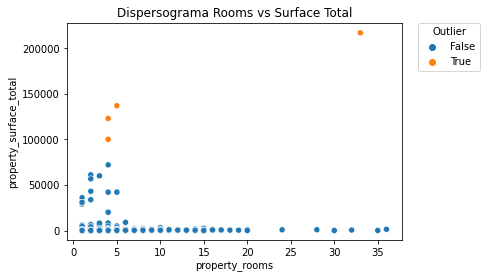

In [ ]:
umbral=5000
mahal[mahal['mahal_ro_sfto']>umbral]

es_outlier = (mahal['mahal_ro_sfto'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_surface_total, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Surface Total')
plt.show()

##### Caracteristicas

En esta nueva comparación, contamos -una vez más- con la presencia de registros aislados en la parte superior izquierda que podríamos clasificarlos como outliers globales.

##### Conclusiones

#### Property rooms vs Property surface covered

##### Scatter

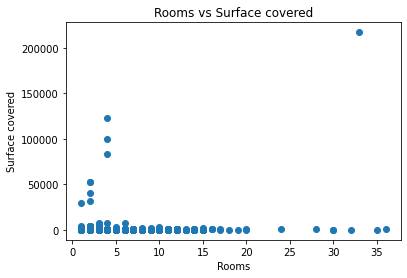

In [ ]:
plt.scatter(df.property_rooms,df.property_surface_covered)
plt.title('Rooms vs Surface covered')
plt.xlabel('Rooms')
plt.ylabel('Surface covered')
plt.show()

##### Mahalanobis

In [ ]:
X = mahal[['property_rooms','property_surface_covered']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_sfcv'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

id start_date   end_date created_on    latitud  \
92828   1gMQ4rXcpnPs+hhvW11Jdw== 2021-08-03 2021-10-28 2021-08-03 -34.622385   
19975   p7gmyqzdOy/+odHwH5oPyg== 2021-01-27 2021-06-05 2021-01-27 -34.618084   
266756  ZYkS+4dCz1vUENzAREcX9w== 2021-09-02 2021-09-02 2021-09-02 -34.601159   
454638  UL/s8zoicLDXXwhaelBgFQ== 2021-12-16 2022-02-09 2021-12-16 -34.605542   
409114  wnz+hkCE7RVBNcqDQEtFSw== 2021-03-19 2021-06-05 2021-03-19 -34.593266   

         longitud         place_l2       place_l3       place_l4  \
92828  -58.448886  Capital Federal      Caballito      Caballito   
19975  -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  ...   z_price  zm_price  z_surface_covered  \
92828   Departamento  ...  0.200139  1.665746           0.006348   
19975   Departamento  ...  0.724609  3.539711          -0.023179   
266756  Departamento  ... -0.482180 -0.772224          -0.055473   
454638  Departamento  ... -0.521817 -0.913847          -0.055473   
409114  Departamento  ... -0.476492 -0.751899          -0.046246   

        zm_surface_covered  z_surface_total  zm_surface_total  mahal_sfto_prc  \
92828             1.252643        -0.000075           1.29504        0.037174   
19975             0.224833        -0.032962           0.13490        0.760230   
266756           -0.899333        -0.061260          -0.86336        0.257801   
454638           -0.899333        -0.063554          -0.94430        0.295150   
409114           -0.578143        -0.055906          -0.67450        0.234985   

        mahal_ro_bdro  mahal_ro_sfto  mahal_ro_sfcv  
92828        1.162088       0.643654       0.684646  
19975        0.990185       0.330597       0.356928  
266756       2.148693       1.594591       1.714027  
454638       2.148693       1.594707       1.714027  
409114       2.148693       1.594357       1.714598  

[5 rows x 29 columns]

In [ ]:
np.sort(mahal.mahal_ro_sfcv)

array([1.30913335e-02, 1.30913335e-02, 1.30913335e-02, ...,
       1.09703304e+04, 1.65884888e+04, 5.15348672e+04])

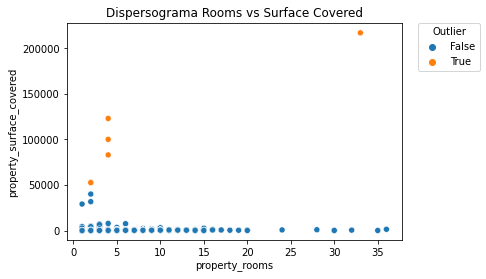

In [ ]:
umbral=3000
mahal[mahal['mahal_ro_sfcv']>umbral]

es_outlier = (mahal['mahal_ro_sfcv'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_surface_covered, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Surface Covered')
plt.show()

##### Caracteristicas

Luego de la comparación de surface covered vs property rooms, notamos que nuevamente estamos en presencia de outliers, en particular esta vez todos de carácter global.


#### Property rooms vs Property price

##### Scatter

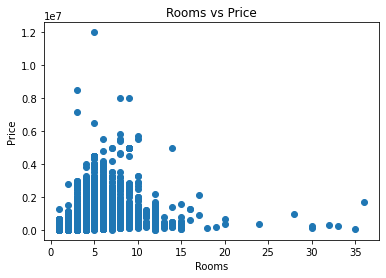

In [ ]:
plt.scatter(mahal.property_rooms,mahal.property_price)
plt.title('Rooms vs Price')
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

##### Mahalanobis

In [ ]:
X = mahal[['property_rooms','property_price']]
sample_X = X.sample(frac=0.1)

mu = sample_X.mean()
X_diff = X - mu
X_diff = X_diff.values.T

cov = np.cov(sample_X.values.T)
inv_cov = np.linalg.inv(cov)
W = sc.linalg.sqrtm(inv_cov)

Wx = np.matmul(W, X_diff)

mahal['mahal_ro_pr'] = np.array([np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])])

mahal.head()

id start_date   end_date created_on    latitud  \
92828   1gMQ4rXcpnPs+hhvW11Jdw== 2021-08-03 2021-10-28 2021-08-03 -34.622385   
19975   p7gmyqzdOy/+odHwH5oPyg== 2021-01-27 2021-06-05 2021-01-27 -34.618084   
266756  ZYkS+4dCz1vUENzAREcX9w== 2021-09-02 2021-09-02 2021-09-02 -34.601159   
454638  UL/s8zoicLDXXwhaelBgFQ== 2021-12-16 2022-02-09 2021-12-16 -34.605542   
409114  wnz+hkCE7RVBNcqDQEtFSw== 2021-03-19 2021-06-05 2021-03-19 -34.593266   

         longitud         place_l2       place_l3       place_l4  \
92828  -58.448886  Capital Federal      Caballito      Caballito   
19975  -58.359912  Capital Federal  Puerto Madero  Puerto Madero   
266756 -58.398106  Capital Federal      Balvanera      Balvanera   
454638 -58.390007  Capital Federal    San Nicolás    San Nicolás   
409114 -58.381426  Capital Federal         Retiro         Retiro   

       property_type  ...  zm_price  z_surface_covered  zm_surface_covered  \
92828   Departamento  ...  1.665746           0.006348            1.252643   
19975   Departamento  ...  3.539711          -0.023179            0.224833   
266756  Departamento  ... -0.772224          -0.055473           -0.899333   
454638  Departamento  ... -0.913847          -0.055473           -0.899333   
409114  Departamento  ... -0.751899          -0.046246           -0.578143   

        z_surface_total  zm_surface_total  mahal_sfto_prc  mahal_ro_bdro  \
92828         -0.000075           1.29504        0.037174       1.162088   
19975         -0.032962           0.13490        0.760230       0.990185   
266756        -0.061260          -0.86336        0.257801       2.148693   
454638        -0.063554          -0.94430        0.295150       2.148693   
409114        -0.055906          -0.67450        0.234985       2.148693   

        mahal_ro_sfto  mahal_ro_sfcv  mahal_ro_pr  
92828        0.643654       0.684646     0.709812  
19975        0.330597       0.356928     1.713167  
266756       1.594591       1.714027     1.665017  
454638       1.594707       1.714027     1.647938  
409114       1.594357       1.714598     1.667806  

[5 rows x 30 columns]

In [ ]:
np.sort(mahal.mahal_ro_pr)

array([1.17698091e-02, 1.17703937e-02, 1.17703937e-02, ...,
       7.21310924e+02, 9.34463898e+02, 1.82495444e+03])

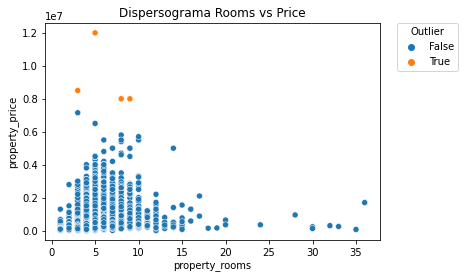

In [ ]:
umbral=700
mahal[mahal['mahal_ro_pr']>umbral]

es_outlier = (mahal['mahal_ro_pr'] > umbral)

sns.scatterplot(x=mahal.property_rooms,y=mahal.property_price, hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma Rooms vs Price')
plt.show()

##### Caracteristicas

Nuevamente visualizamos outliers globales.

### Tratamiento

Para cada una de las variables, estudiamos si es posible eliminar los valores atípicos encontrados con los métodos previamente descriptos analizando la proporción que estos representan sobre el total de los valores, teniendo en cuenta la decisión de admitir una tolerancia del 10% de otuliers.

#### Property rooms

In [ ]:
rooms_outliers_porcentaje = df[(df['zm_rooms']>3.5)].shape[0]/df['zm_rooms'].shape[0]*100

print(f"Los valores atípicos encontrados para property_rooms representan un {round(rooms_outliers_porcentaje, 3)}% del total del dataset.")

Los valores atípicos encontrados para property_rooms representan un 0.426% del total del dataset.


Eliminamos los outliers del dataset:

In [ ]:
df.drop(df[df['zm_rooms']>3.5].index, inplace=True)

#### Property bedrooms

In [ ]:
bedrooms_outliers_porcentaje = df[(df['zm_bedrooms']>3.5)].shape[0]/df['zm_bedrooms'].shape[0]*100

print(f"Los valores atípicos encontrados para property_bedrooms representan un {round(bedrooms_outliers_porcentaje, 3)}% del total del dataset.")

Los valores atípicos encontrados para property_bedrooms representan un 0.032% del total del dataset.


In [ ]:
df.drop(df[df['zm_bedrooms']>3.5].index, inplace=True)

#### Property price

In [ ]:
price_outliers_porcentaje = df[(df['zm_price']>3.5)].shape[0]/df['zm_price'].shape[0]*100

print(f"Los valores atípicos encontrados para property_price representan un {round(price_outliers_porcentaje, 3)}% del total del dataset.")

Los valores atípicos encontrados para property_price representan un 8.875% del total del dataset.


In [ ]:
df.drop(df[df['zm_price']>3.5].index, inplace=True)

#### Property surface covered

In [ ]:
surface_covered_outliers_porcentaje = df[(df['zm_surface_covered']>3.5)].shape[0]/df['zm_surface_covered'].shape[0]*100

print(f"Los valores atípicos encontrados para property_surface_covered representan un {round(surface_covered_outliers_porcentaje, 3)}% del total del dataset.")

Los valores atípicos encontrados para property_surface_covered representan un 2.508% del total del dataset.


In [ ]:
df.drop(df[df['zm_surface_covered']>3.5].index, inplace=True)

#### Property surface total

In [ ]:
surface_total_outliers_porcentaje = df[(df['zm_surface_total']>3.5)].shape[0]/df['zm_surface_total'].shape[0]*100

print(f"Los valores atípicos encontrados para property_surface_total representan un {round(surface_total_outliers_porcentaje, 3)}% del total del dataset.")

Los valores atípicos encontrados para property_surface_total representan un 1.516% del total del dataset.


In [ ]:
df.drop(df[df['zm_surface_total']>3.5].index, inplace=True)

## **1d. Reducción de la dimensionalidad**

Para realizar la reducción de la dimensionalidad del dataset, estaremos utilizando el algoritmo PCA con el objetivo de reducir la dimensión del problema descartando la información redundante existente.

Generamos un nuevo dataset de reducción de dimensionalidad:

In [ ]:
df_reduc = df.copy()

Normalizamos el data set

In [ ]:
columnas_elegidas = ['property_rooms', 'property_bedrooms', 'property_surface_covered', 'property_surface_total']

x = df_reduc.loc[:, columnas_elegidas].values
x = StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=4)
x_transformada = pca.fit_transform(x)

pca_df_aux = pd.DataFrame(data = x_transformada
             , columns = ['cp_1', 'cp_2','cp_3','cp_4'])

In [ ]:
df_reduc['target'] = 0
target = pd.DataFrame((np.column_stack(df_reduc['target'])).tolist()).T
df_pca = pd.concat([pca_df_aux, target], axis = 1)
df_pca.columns= ['cp_1', 'cp_2','cp_3','cp_4','target']
df_pca.head()

cp_1      cp_2      cp_3      cp_4  target
0  2.824265  0.156156  0.162303  0.057658       0
1 -2.188546 -0.080832  0.407981  0.031628       0
2 -2.232467 -0.030093  0.411418 -0.026497       0
3 -1.904769 -0.350321  0.433037 -0.099681       0
4  5.291453 -0.578361 -1.190110  0.686330       0

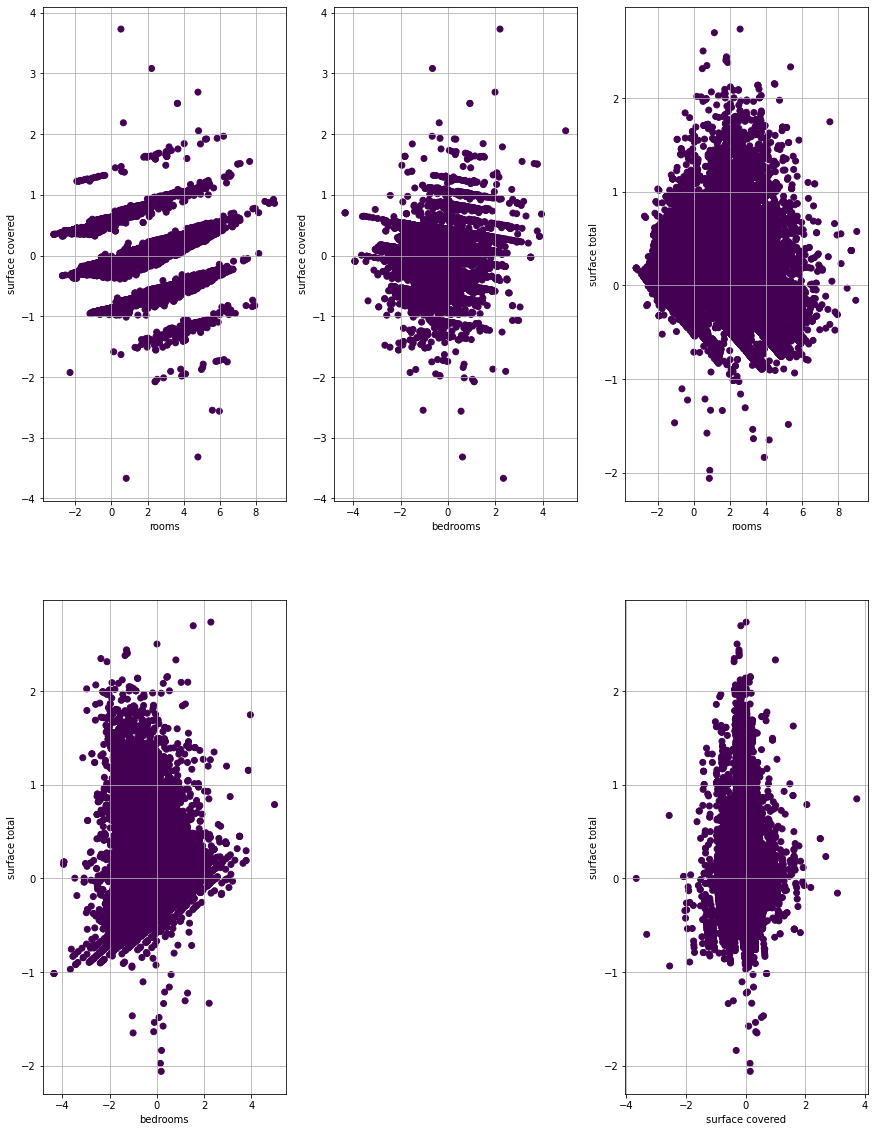

In [ ]:
targets = ['Casa', 'PH', 'Departamento']

fig = plt.figure(figsize = (20,20))

c = df_pca['target']

# plot 1

ax = fig.add_subplot(2, 4, 1) 

x = df_pca['cp_1']
y = df_pca['cp_3']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('rooms', fontsize = 10)
ax.set_ylabel('surface covered', fontsize = 10)
ax.grid()

# plot 2

ax = fig.add_subplot(2, 4, 2) 

x = df_pca['cp_2']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('bedrooms', fontsize = 10)
ax.set_ylabel('surface covered', fontsize = 10)
ax.grid()

# plot 3

ax = fig.add_subplot(2, 4, 3) 

x = df_pca['cp_1']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('rooms', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

# plot 5

ax = fig.add_subplot(2, 4, 5) 

x = df_pca['cp_2']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('bedrooms', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

# plot 7

ax = fig.add_subplot(2, 4, 7) 

x = df_pca['cp_3']
y = df_pca['cp_4']

ax.scatter(x = x, y = y, c = c)

ax.set_xlabel('surface covered', fontsize = 10)
ax.set_ylabel('surface total', fontsize = 10)
ax.grid()

plt.show()

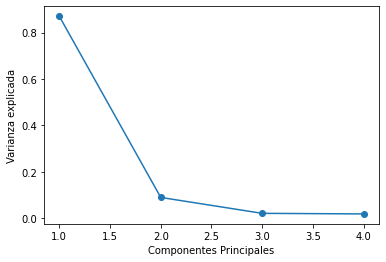

In [ ]:
varianza_explicada = pca.explained_variance_ratio_
list_x = list(range(1, len(varianza_explicada)+1))

plt.figure(figsize=(6, 4))
plt.plot(list_x, varianza_explicada, '-o')
plt.xlabel(r'Componentes Principales')
plt.ylabel('Varianza explicada')
plt.show()

Exporto el data set

In [ ]:
df_reduc.to_csv('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/ds_reduc_dim.csv')

#  **2. Agrupamiento**

Primero removemos entradas del dataframe que contienen coordenadas fuera de CABA



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

CABA_lat = -34.611817
CABA_long = -58.446881

df = df.loc[((CABA_lat - 0.5) < df["latitud"]) & (df["latitud"] < (CABA_lat + 0.5))]
df = df.loc[((CABA_long - 0.5) < df["longitud"]) & (df["longitud"] < (CABA_long + 0.5))]

El primer análisis de clustering lo realizamos entre las variables longitud y latitud, viendo la tendencia al agrupamiento que existe en la posición geográfica:



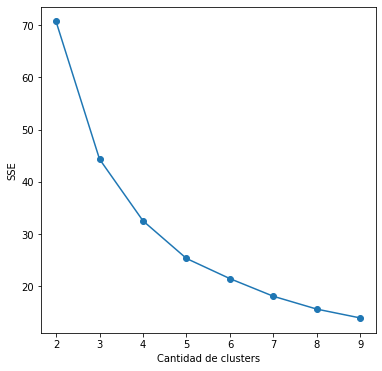

In [ ]:
X = np.column_stack((df.longitud.tolist(), df.latitud.tolist()))

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

Utilizando 5 clusters



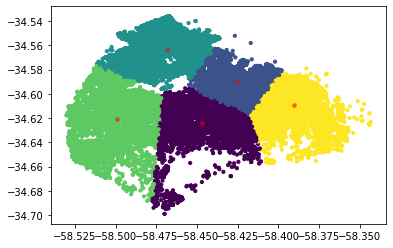

Silhouette Score para 5 clusters = 0.40923487539565123


In [ ]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5,marker='.')
plt.show()
print ("Silhouette Score para 5 clusters = " + str(silhouette_score(X, y_kmeans)))

Utilizando 3 clusters



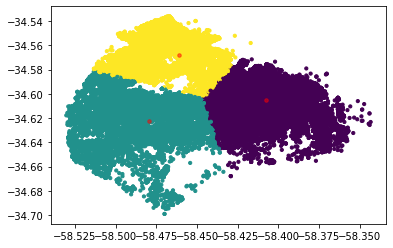

Silhouette Score para 3 clusters = 0.45850527502628013


In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5,marker='.')
plt.show()

print ("Silhouette Score para 3 clusters = " + str(silhouette_score(X, y_kmeans)))

Viendo la curva de cantidad de clusters contra la distancia media al centroide (SSE) podemos ver que no existen clusters definidos, no se ve un claro codo en el cual elegir un numero de clusters ideal. No existen agrupamientos definidos.

Un segundo análisis que decidimos realizar es si existe clustering entre tres variables: longitud, latitud y precio. Obtuvimos los mismos resultados que el caso anterior:

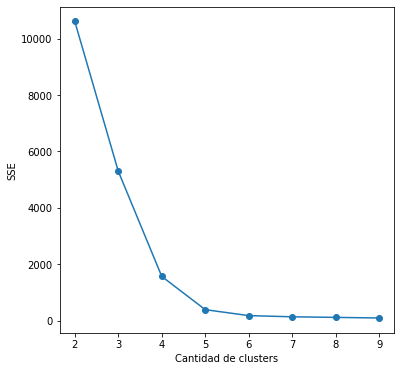

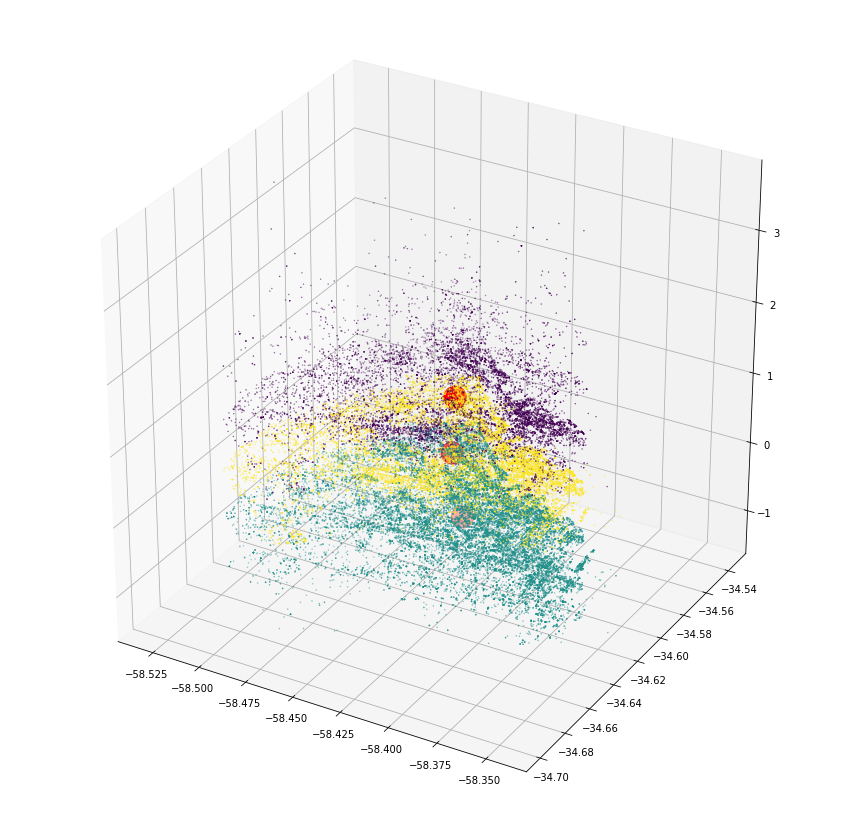

In [ ]:
X = df.iloc[:,[5,4,15]].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

centers = kmeans.cluster_centers_
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=0.2)
ax.scatter(centers[:,0], centers[:,1], centers[:,2], c="red", s=500, marker="o")

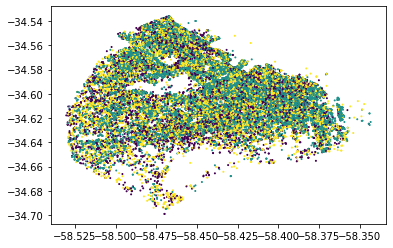

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=1)


Como no obtuvimos un clustering definido, buscamos ver si existía un agrupamiento entre ubicación geográfica y precio por metro cuadrado. Los resultados fueron similares.

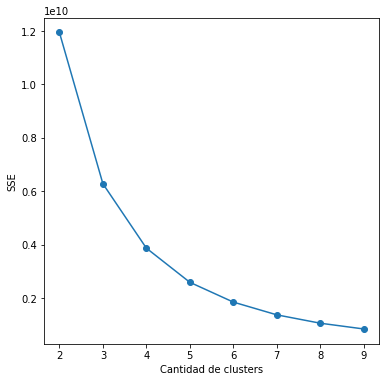

In [ ]:
df["property_m2price"] = df["property_price"] / df["property_surface_total"]
X = df.iloc[:,[5,4, df.shape[1]-1]].loc[(df.property_m2price < 5000)].values
sse = []
sscore = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    y_kmeans = km.predict(X)
    sse.append(km.inertia_)
    sscore.append(silhouette_score(X, y_kmeans))
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

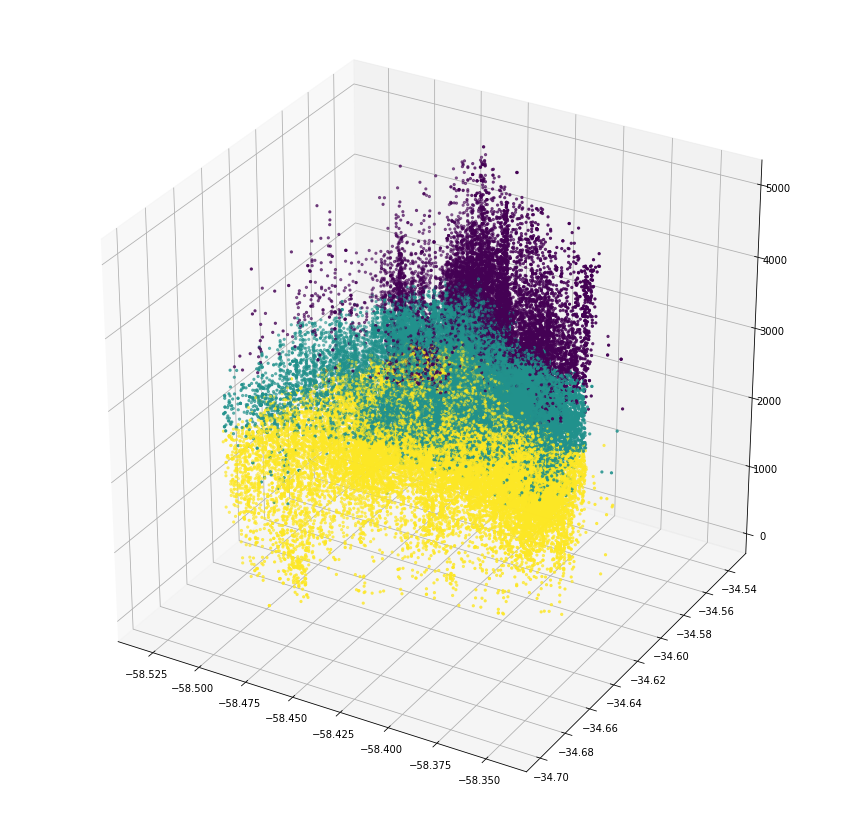

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(projection='3d')

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
ax.scatter(X[:,0], X[:,1], X[:,2], c=y_kmeans, s=5)

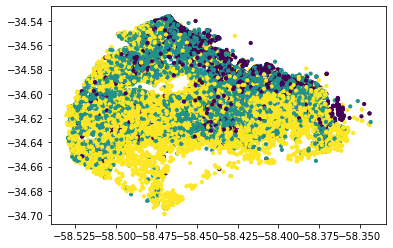

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=10)


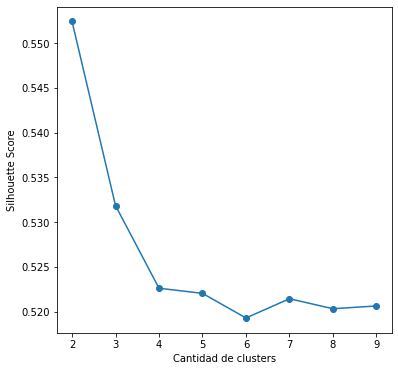

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(list_k, sscore, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('Silhouette Score')
plt.show()

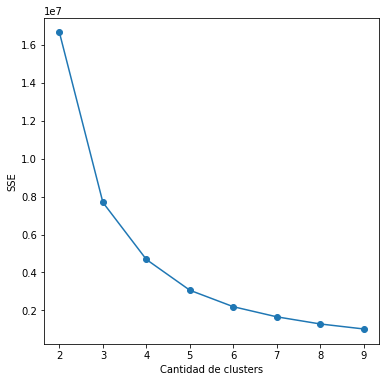

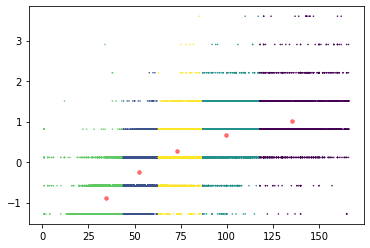

In [ ]:
X = df.iloc[:,[15,13]].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

kmeans = KMeans(n_clusters=5, max_iter=900)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
plt.show()

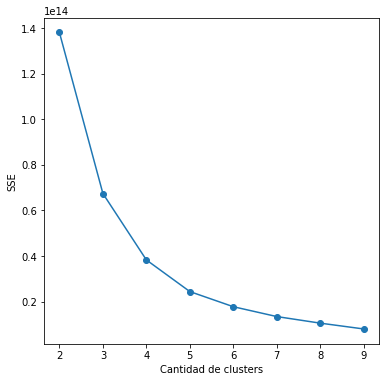

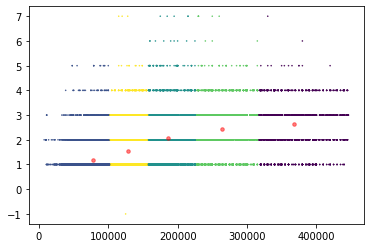

In [ ]:
X = df.iloc[:,[11,14]].loc[df.property_rooms.notna()].values

sse = []
list_k = list(range(2, 10))

for k in list_k:
   km = KMeans(n_clusters=k)
   km.fit(X)
   sse.append(km.inertia_)
    
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Cantidad de clusters')
plt.ylabel('SSE')
plt.show()

kmeans = KMeans(n_clusters=5, max_iter=900)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 1], X[:, 0], c=y_kmeans, s=0.3)

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c='red', s=50, alpha=0.5,marker='.')
plt.show()

#  **3. Clasificación**

## **3a. Construcción del target**

3.a.1 Primera alternativa, variable pxm2 en 3 intervalos con igual cantidad de observaciones

In [ ]:
df.sort_values(by=["property_m2price"], inplace=True)

In [ ]:
df['tipo_precio_1'] = pd.qcut(x=df['property_m2price'], q=3, labels=['bajo', 'medio', 'alto'])

3.a.2 Segunda alternativa, variable pxm2 en 3 intervalos, 25% a bajo, 50% a medio y el otro 25% restante a alto

In [ ]:
df['tipo_precio_2'] = pd.qcut(x=df['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto'])
df['tipo_precio_2'].replace("medio2","medio", inplace=True)

3.a.3 Tercera alternativa, como el punto anterior pero separado por tipo de propiedad

In [ ]:
df['tipo_precio_3'] = pd.qcut(x=df.loc[df['property_type'] == 'Departamento']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio")
df['tipo_precio_3'].fillna(pd.qcut(x=df.loc[df['property_type'] == 'Casa']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)
df['tipo_precio_3'].fillna(pd.qcut(x=df.loc[df['property_type'] == 'PH']['property_m2price'], q=4, labels=['bajo', 'medio', 'medio2', 'alto']).replace("medio2","medio"), inplace=True)

Analizamos las distribuciones del precio por metro cuadrado, el precio por metro cuadrado segun el tipo de propiedad y las distribuciones de los tipos de precio segun tipo de propiedad. Es importante notar que los gráficos estan en escala logarítmica ya que las cantidades tienen ordenes de magnitud muy distintos.

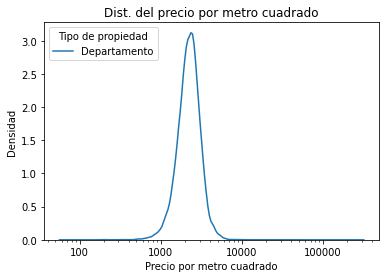

In [ ]:
sns.kdeplot(data=df, x="property_m2price", log_scale=True).set(title='Dist. del precio por metro cuadrado')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.legend(title='Tipo de propiedad', loc='upper left', labels=['Departamento', 'PH', 'Casa'])
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

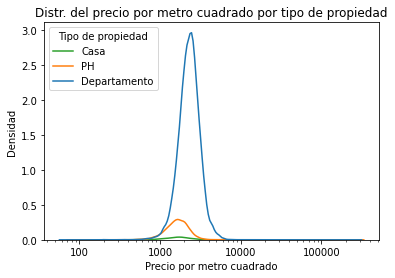

In [ ]:
sns.kdeplot(data=df, x="property_m2price", hue="property_type", log_scale=True).set(title='Distr. del precio por metro cuadrado por tipo de propiedad')
plt.xlabel('Precio por metro cuadrado')
plt.ylabel('Densidad')
plt.legend(title='Tipo de propiedad', loc='upper left', labels=['Casa', 'PH', 'Departamento'])
ax=plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

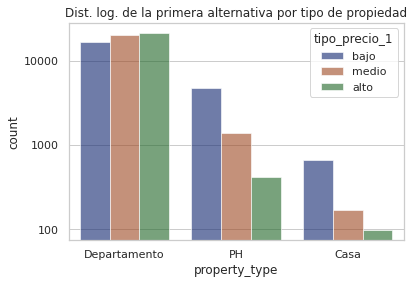

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(
    x='property_type',
    hue='tipo_precio_1',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la primera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

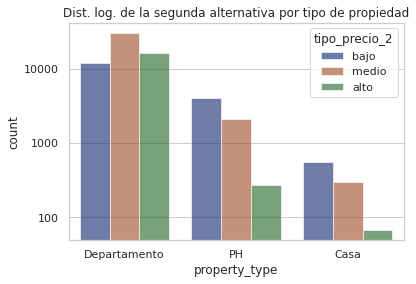

In [ ]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_2',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la segunda alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

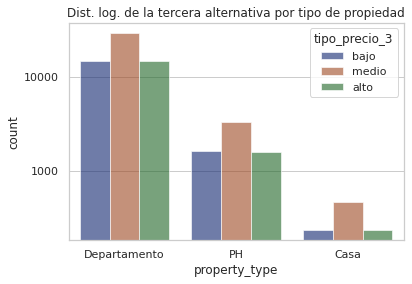

In [ ]:
sns.countplot(
    x='property_type',
    hue='tipo_precio_3',
    data=df,palette="dark",
    alpha=.6,
    log=True).set(title='Dist. log. de la tercera alternativa por tipo de propiedad')
ax=plt.gca()
ax.yaxis.set_major_formatter(mticker.ScalarFormatter())

Analizando el gráfico "Distr. del precio por metro cuadrado por tipo de propiedad" podemos ver que la mediana del precio es distinta según el tipo de propiedad. Por este motivo decidimos que la mejor alternativa es la tercera, ya que separa las bandas de precio según el tipo de propiedad.

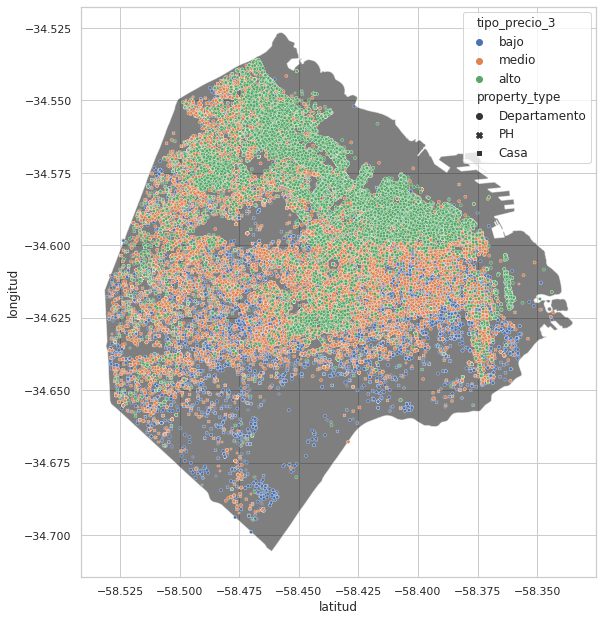

In [ ]:
gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson').plot(cmap='cubehelix', alpha=0.5)
sns.scatterplot(x="longitud", 
                y="latitud", 
                s=10,
                hue="tipo_precio_3",
                style="property_type",
                data=df,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Realizamos el agrupamiento por K-means

In [ ]:
df_aux=df.loc[(df.property_m2price < 8000)]
X = df_aux.loc[:,["latitud","longitud", "property_m2price"]].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

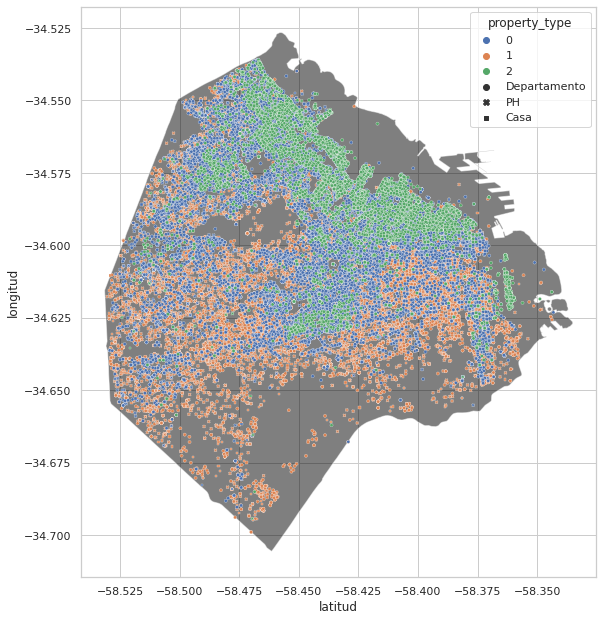

In [ ]:
gpd.read_file('/content/drive/MyDrive/📔 Organización de Datos (75.06)/TPS/TP1/caba.geojson').plot(cmap='cubehelix', alpha=0.5)
sns.scatterplot(x="longitud", 
                y="latitud", 
                s=10,
                hue=y_kmeans,
                style="property_type",
                data=df_aux,
                palette="deep")
plt.xlabel("latitud")
plt.ylabel("longitud")
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Observando los mapas resultantes, podemos ver que los dos tipos de agrupamientos dieron resultaros similares

## **3b. Entrenamiento y Predicción**

Primero creamos un dataset sin los features a predecir. También quitamos las columnas "place" superiores a l4, que tienen información repetida y las columnas de variables reducidasm que utilizaremos para otros modelos.

In [ ]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'latitud', 'longitud',
       'place_l2', 'place_l3', 'place_l4', 'property_type', 'property_rooms',
       'property_bedrooms', 'property_surface_total',
       'property_surface_covered', 'property_price', 'z_rooms', 'zm_rooms',
       'z_bedrooms', 'zm_bedrooms', 'z_price', 'zm_price', 'z_surface_covered',
       'zm_surface_covered', 'z_surface_total', 'zm_surface_total',
       'property_m2price', 'tipo_precio_1', 'tipo_precio_2', 'tipo_precio_3'],
      dtype='object')

In [ ]:
ds_trabajo_x=df.drop(['tipo_precio_1', 'tipo_precio_2', 'tipo_precio_3', 'z_price', 'zm_price', 'place_l2', 'place_l3', 'property_price', 'id', 'property_m2price','z_rooms','zm_rooms','z_bedrooms','zm_bedrooms','z_surface_covered','zm_surface_covered','z_surface_total',
    'zm_surface_total'], axis='columns')

Reemplazamos las fechas por valores numéricos

In [ ]:
import math
import sys
max_end_date = max(ds_trabajo_x['end_date'])
ds_trabajo_x['start_date'] = ds_trabajo_x['start_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['start_date']))
ds_trabajo_x['end_date'] = ds_trabajo_x['end_date'].apply(lambda x: x.toordinal() if not pd.isna(x) else max_end_date.toordinal())
ds_trabajo_x['created_on'] = ds_trabajo_x['created_on'].apply(lambda x: x.toordinal() if not pd.isna(x) else max(df['created_on']))

Creamos un dataframe para el entrenamiento con variables reducidas

In [ ]:
from scipy.stats import zscore
numeric_cols = ds_trabajo_x.select_dtypes(include=[np.number]).columns # Solo en las de tipo numérico
ds_reducida_x = ds_trabajo_x[numeric_cols].apply(zscore)
ds_reducida_x['property_type'] = ds_trabajo_x['property_type'] 
ds_reducida_x['place_l4'] = ds_trabajo_x['place_l4'] 

Realizamos one hot encoding para las variables cualitativas

In [ ]:
ds_trabajo_x = pd.get_dummies(ds_trabajo_x, columns=['place_l4', 'property_type'], drop_first=True)
ds_reducida_x = pd.get_dummies(ds_reducida_x, columns=['place_l4', 'property_type'], drop_first=True)

Luego creamos un dataset con la variable target

In [ ]:
ds_trabajo_y = df['tipo_precio_3'].copy()

Separamos en conjuntos de test y train

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(ds_trabajo_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.2,
                                                    random_state=100)
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(ds_reducida_x,
                                                    ds_trabajo_y, 
                                                    test_size=0.2,
                                                    random_state=100)

## Modelo 1: Arbol de Decisión

Primero entrenamos un arbol de decisión con las variables normales

In [ ]:
param_grid = {
    'max_depth': [*range(18, 23, 1)],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00003,0.00004,0.00005, 0.00006,0.00007]}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [3e-05, 4e-05, 5e-05, 6e-05, 7e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 19, 20, 21, 22]})

In [ ]:
grid.best_params_

{'ccp_alpha': 6e-05, 'criterion': 'gini', 'max_depth': 22}

In [ ]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

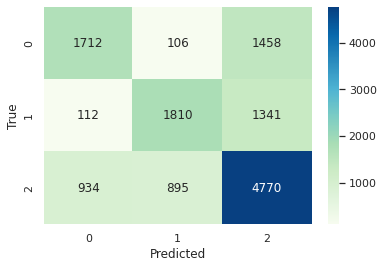

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.7420171265461465  y el Accuracy del modelo evaluando el set de test es:  0.6311462931953113


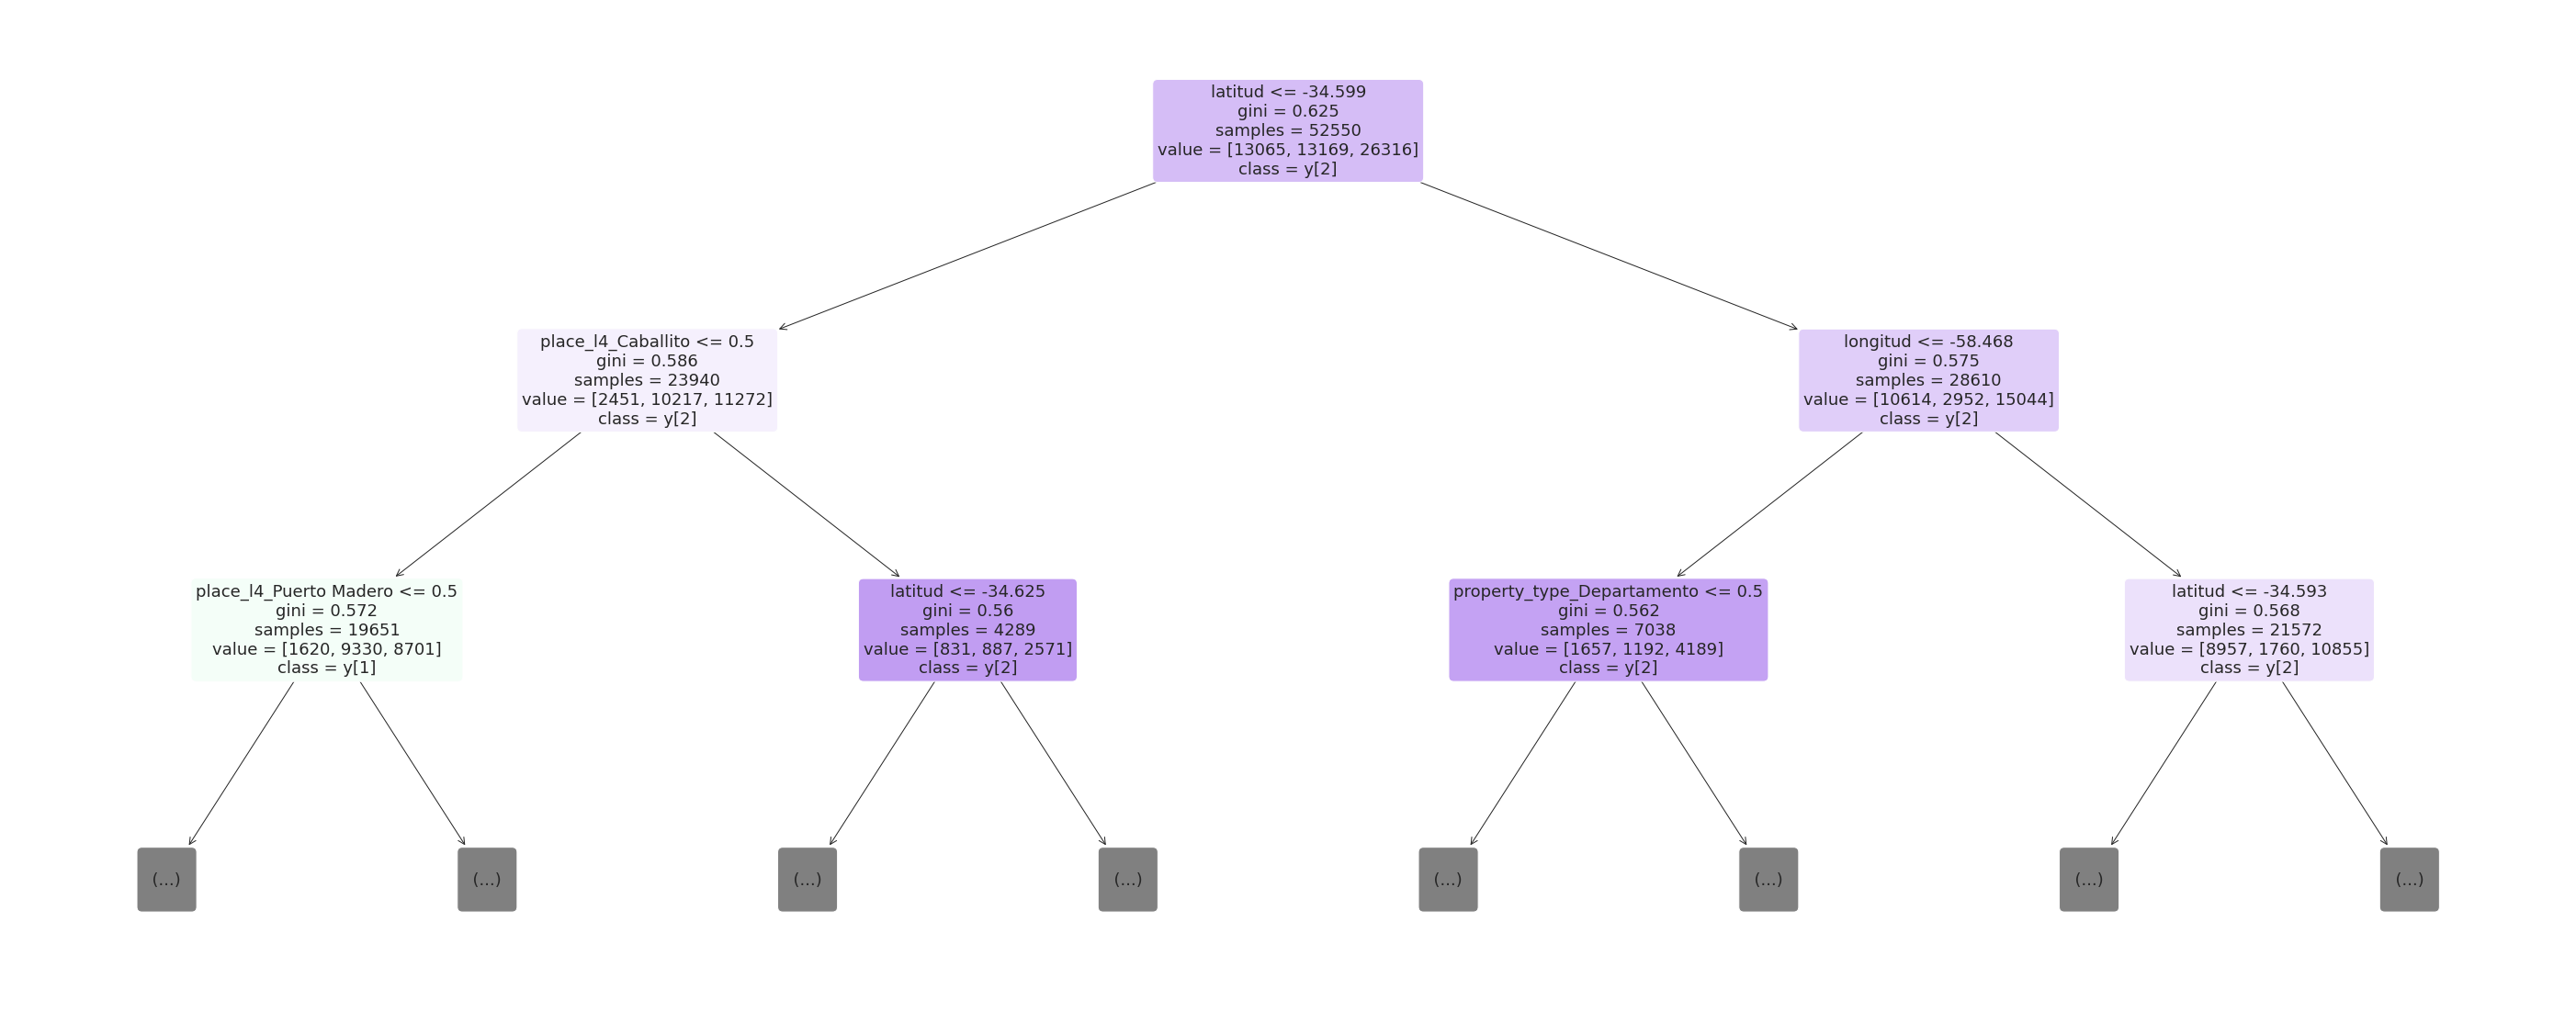

In [ ]:
plt.figure(figsize=(50,20))

tree_plot=tree.plot_tree(grid.best_estimator_,
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Luego entrenamos un arbol de decisión con las variables reducidas

In [ ]:
param_grid = {
    'max_depth': [*range(18, 23, 1)],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00003,0.00004,0.00005, 0.00006,0.00007]}

grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train_red)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [3e-05, 4e-05, 5e-05, 6e-05, 7e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 19, 20, 21, 22]})

In [ ]:
grid.best_params_

{'ccp_alpha': 6e-05, 'criterion': 'gini', 'max_depth': 22}

In [ ]:
y_pred = grid.predict(x_test_red)

Text(30.5, 0.5, 'True')

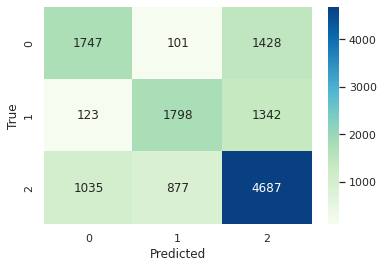

In [ ]:
matrix=confusion_matrix(y_test_red, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.7455946717411989  y el Accuracy del modelo evaluando el set de test reducido es:  0.6265793880347085


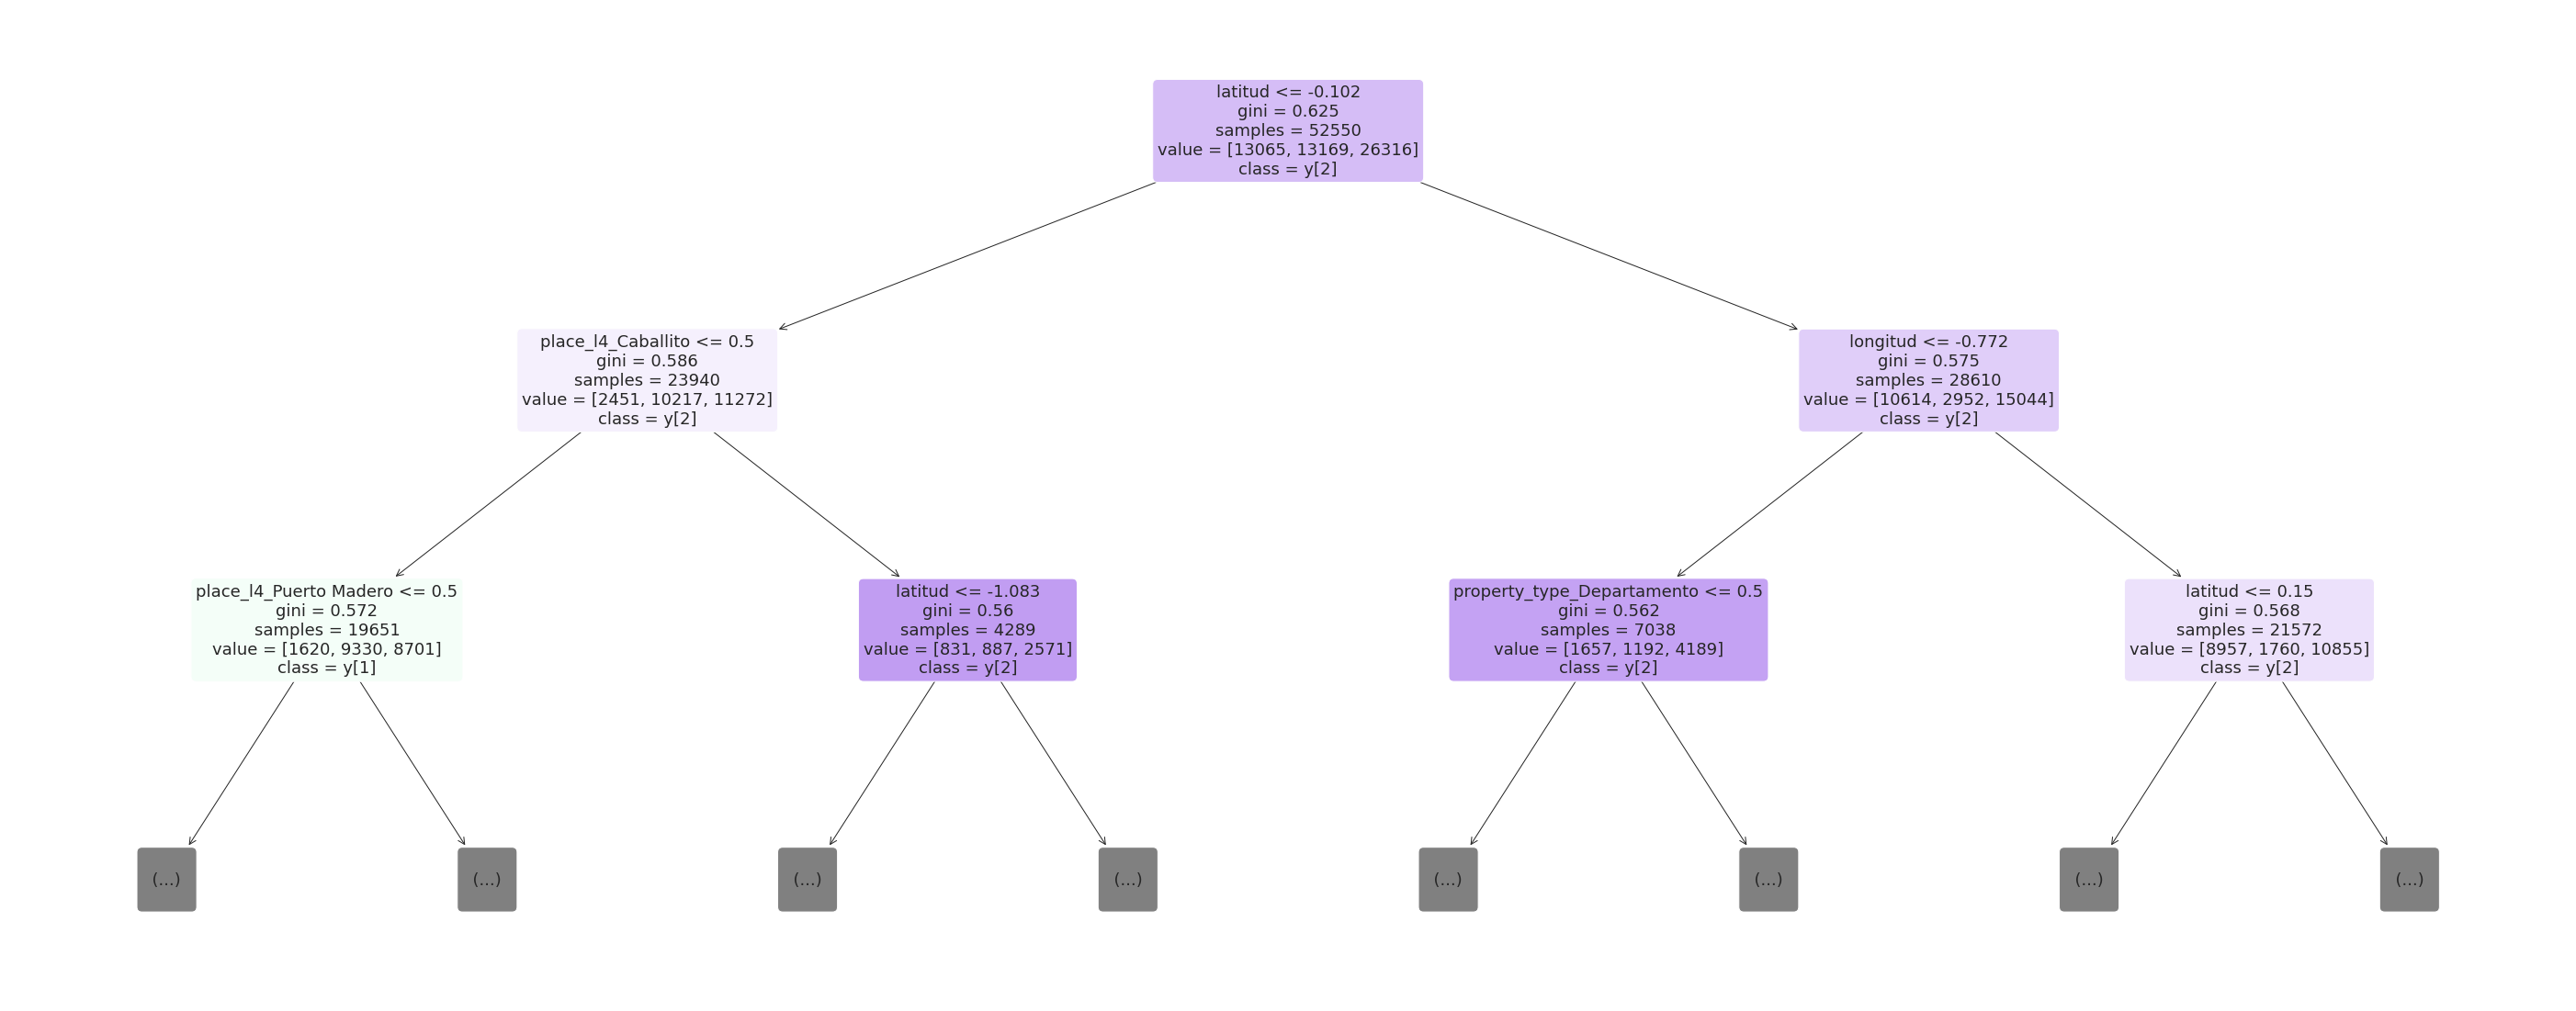

In [ ]:
plt.figure(figsize=(50,20))

tree_plot=tree.plot_tree(grid.best_estimator_,
                         max_depth=2,
                         feature_names=ds_reducida_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

El modelo decide en base a la ubicación geográfica de la propiedad. En primer lugar verifica la latitud, separando CABA en Norte y Sur.

Para la parte Sur, verifica el barrio de Caballito. En caso negativo, verifica si el barrio es Puerto Madero ya que las propiedades suelen tener mayor valor. Si Caballito es afirmativo, vuelve a verificar por  latitud si se trata de la parte Sur del mismo.

Para la parte Norte de CABA, verifica la longitud para ver si se trata de la zona Este u Oeste. Para la zona Este, basa su decisión en la latitud, verificando si se trata de la parte Norte de la misma.
En el caso de la zona Oeste, verifica si la propiedad se trata de un departamento.

## Modelo 2: Random Forest

Primero entrenamos un modelo Random Forest de decisión con las variables normales

In [ ]:
param_grid = {
    'n_estimators': [45, 55, 65],
    'max_depth': [23, 25, 27],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00002,0.000025]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [2e-05, 2.5e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [23, 25, 27],
                         'n_estimators': [45, 55, 65]})

In [ ]:
grid.best_params_

{'ccp_alpha': 2e-05, 'criterion': 'gini', 'max_depth': 27, 'n_estimators': 55}

In [ ]:
y_pred = grid.predict(x_test)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

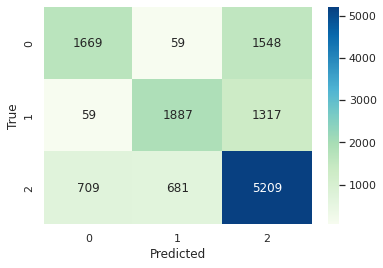

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.9422074215033301  y el Accuracy del modelo evaluando el set de test es:  0.6671487288780636


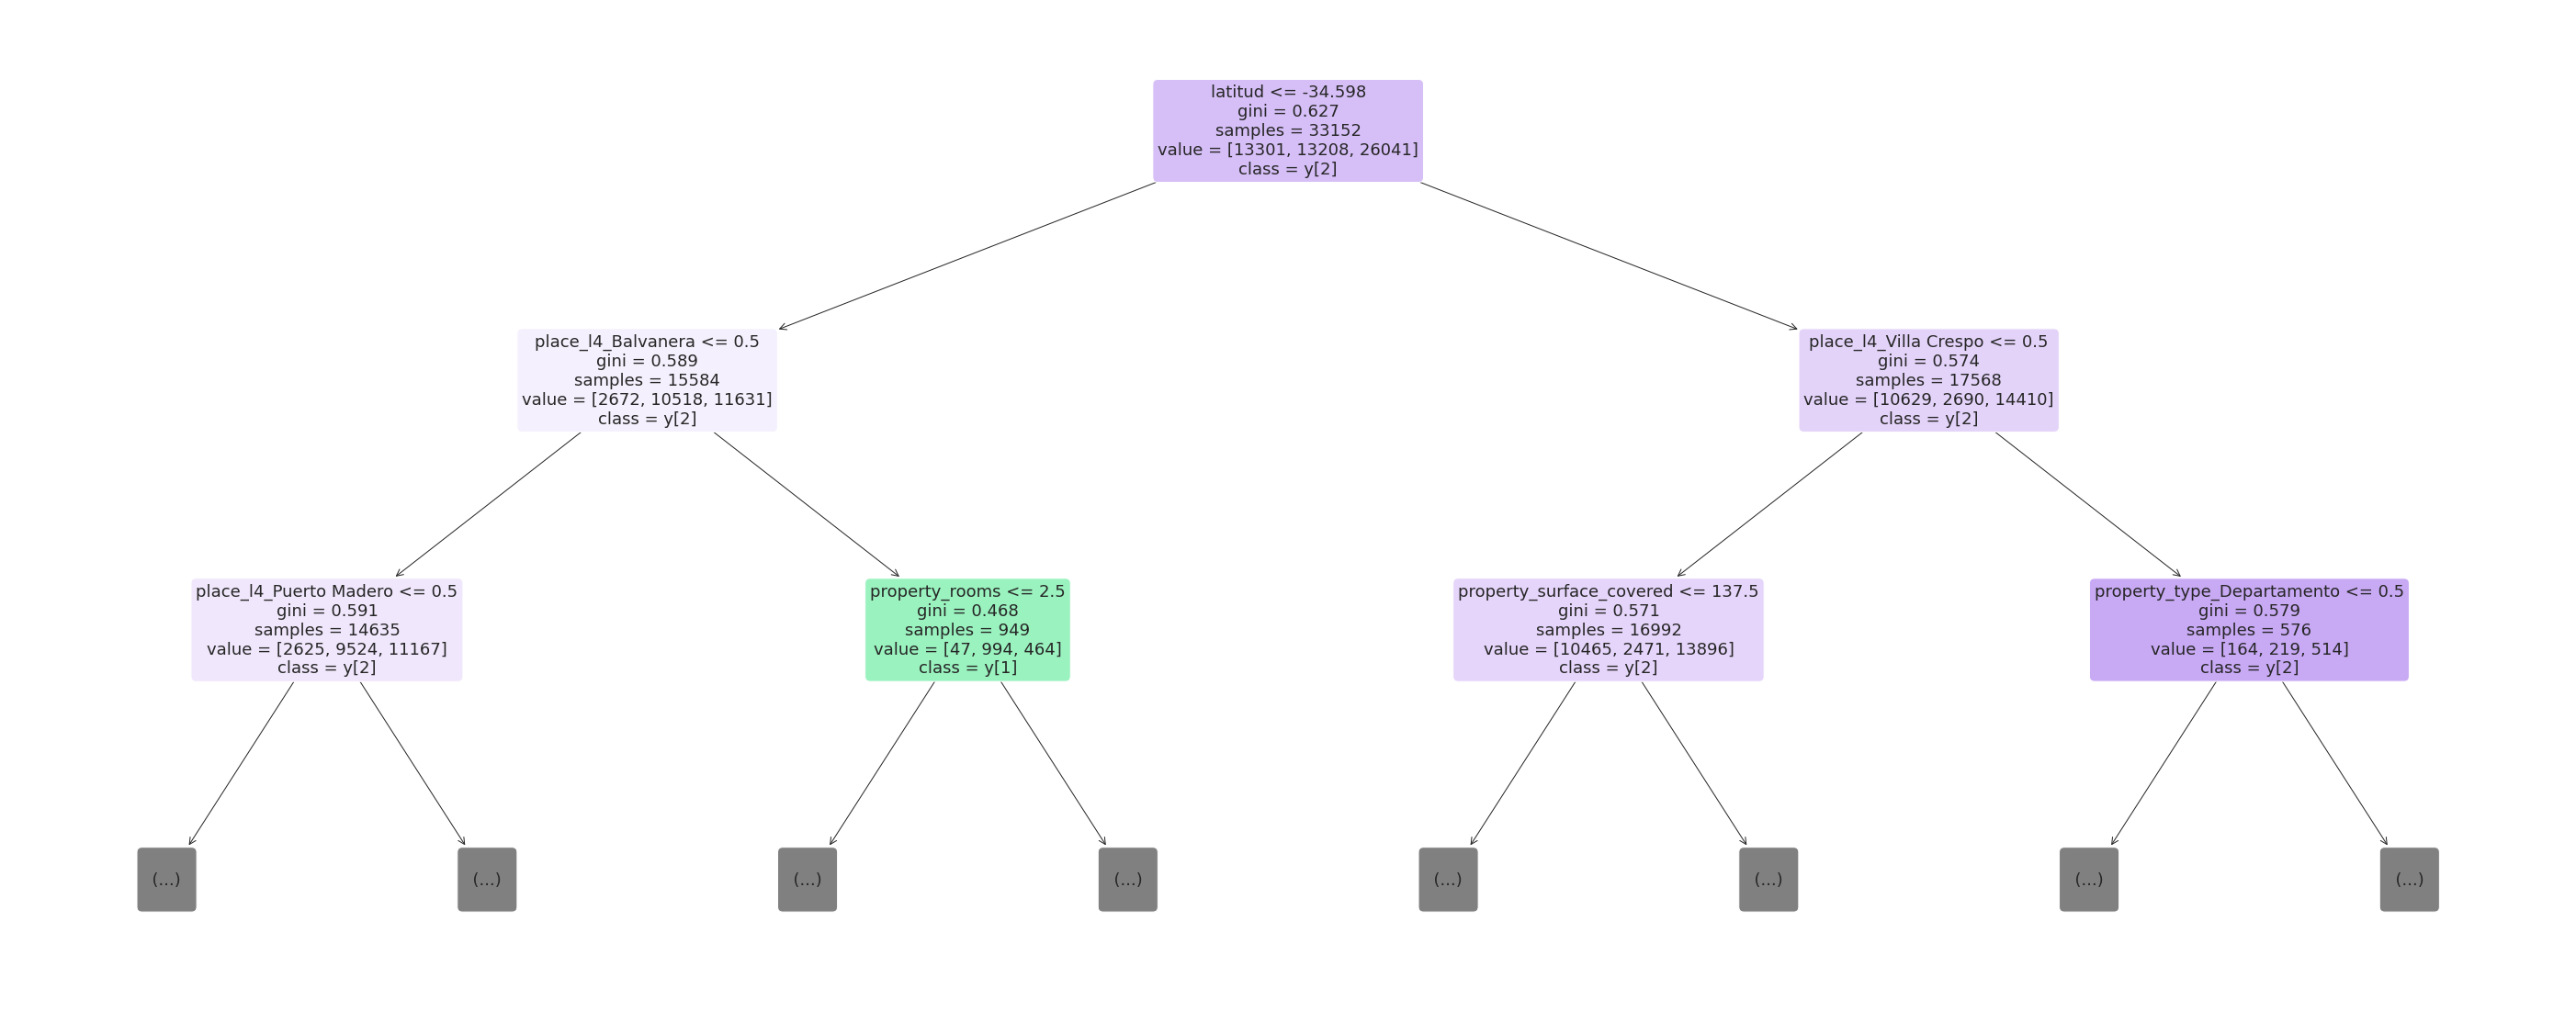

In [ ]:
plt.figure(figsize=(50,20))
tree_plot=tree.plot_tree(grid.best_estimator_.estimators_[1],
                         max_depth=2,
                         feature_names=ds_trabajo_x.columns.to_list(),
                         filled=True,
                         rounded=True,
                         class_names=True)

plt.show(tree_plot)

Luego entrenamos un modelo Random Forest de decisión con las variables reducidas

In [ ]:
param_grid = {
    'n_estimators': [40, 55],
    'max_depth': [23, 25],
    'criterion': ['gini', 'entropy'],
    'ccp_alpha': [0.00002,0.000025]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train_red)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [2e-05, 2.5e-05],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [23, 25], 'n_estimators': [40, 55]})

In [ ]:
grid.best_params_

{'ccp_alpha': 2e-05, 'criterion': 'gini', 'max_depth': 25, 'n_estimators': 55}

In [ ]:
y_pred = grid.predict(x_test_red)

Podemos ver los resultados con una matriz de confusión.
Orden: Alto, Bajo, Medio

Text(30.5, 0.5, 'True')

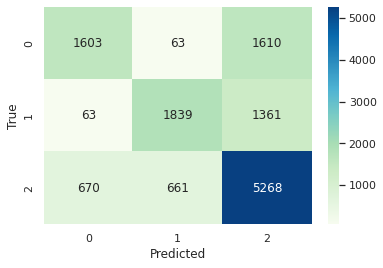

In [ ]:
matrix=confusion_matrix(y_test_red, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.9107706945765938  y el Accuracy del modelo evaluando el set de test reducido es:  0.662962399147511


## Método 3: KNN

Primero entrenamos un modelo K-nearest neighbours con las variables normales

In [ ]:
param_grid = {
    'n_neighbors': [*range(5, 8, 1)],
    'algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance'],
    'n_jobs':[-1],
    'leaf_size':[*range(18, 23, 2)]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 22], 'n_jobs': [-1],
                         'n_neighbors': [5, 6, 7],
                         'weights': ['uniform', 'distance']})

In [ ]:
grid.best_params_

{'algorithm': 'brute',
 'leaf_size': 18,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
y_pred = grid.predict(x_test)

pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])

test   pred
0       alto   alto
1      medio  medio
2      medio  medio
3      medio  medio
4       alto  medio
...      ...    ...
13133  medio  medio
13134   bajo  medio
13135   alto   alto
13136   alto   alto
13137   alto  medio

[13138 rows x 2 columns]

Text(30.5, 0.5, 'True')

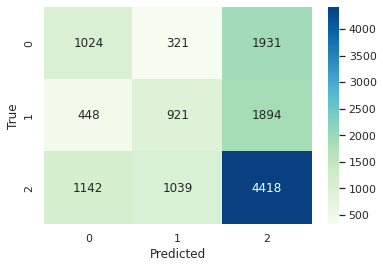

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train, y_train)
score_test = grid.score(x_test, y_test)
print('El Accuracy del modelo evaluando el set de train es: ', score_train, ' y el Accuracy del modelo evaluando el set de test es: ', score_test)

El Accuracy del modelo evaluando el set de train es:  0.9955661274976213  y el Accuracy del modelo evaluando el set de test es:  0.4843202922819303


Luego entrenamos un modelo K-nearest neighbours con las variables reducidas

In [ ]:
param_grid = {
    'n_neighbors': [7],
    'algorithm': ['ball_tree'],
    'weights': ['distance'],
    'n_jobs':[-1],
    'leaf_size':[20]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(x_train_red, y_train) 

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [20],
                         'n_jobs': [-1], 'n_neighbors': [7],
                         'weights': ['distance']})

In [ ]:
grid.best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'n_jobs': -1,
 'n_neighbors': 7,
 'weights': 'distance'}

In [ ]:
y_pred = grid.predict(x_test_red)

pd.DataFrame(zip(y_test,y_pred),columns=['test','pred'])

test   pred
0       alto   alto
1      medio   alto
2      medio  medio
3      medio   alto
4       alto  medio
...      ...    ...
13133  medio  medio
13134   bajo  medio
13135   alto   alto
13136   alto  medio
13137   alto  medio

[13138 rows x 2 columns]

Text(30.5, 0.5, 'True')

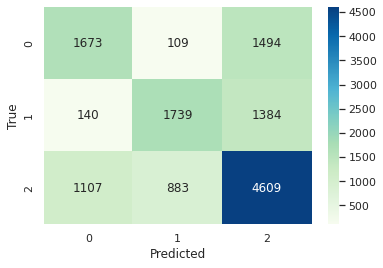

In [ ]:
matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(matrix,cmap='GnBu',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

In [ ]:
score_train = grid.score(x_train_red, y_train_red)
score_test = grid.score(x_test_red, y_test_red)
print('El Accuracy del modelo evaluando el set de train reducido es: ', score_train, ' y el Accuracy del modelo evaluando el set de test reducido es: ', score_test)

El Accuracy del modelo evaluando el set de train reducido es:  0.9960989533777355  y el Accuracy del modelo evaluando el set de test reducido es:  0.6105191048865886


#  **4. Regresión**

En esta última parte del trabajo, buscaremos predecir el precio de la propiedad (variable property_price) utilizando los modelos

- KNN
- XGBoost
- Adaboost

Trabajaremos tanto con el data set de train (df), como con el resultante del item 1d (df_reduc). Como se menciono previamente, las tareas de ingenieria de caracteristicas ya fueron realizadas previamente.

## Modelo KNN

In [ ]:
df_knn = df.copy()

### Analisis de correlación

Para tomar un indicio inicial, procedemos a analizar el grafico de a pares entre todas las variables de nuestro data set inicial.



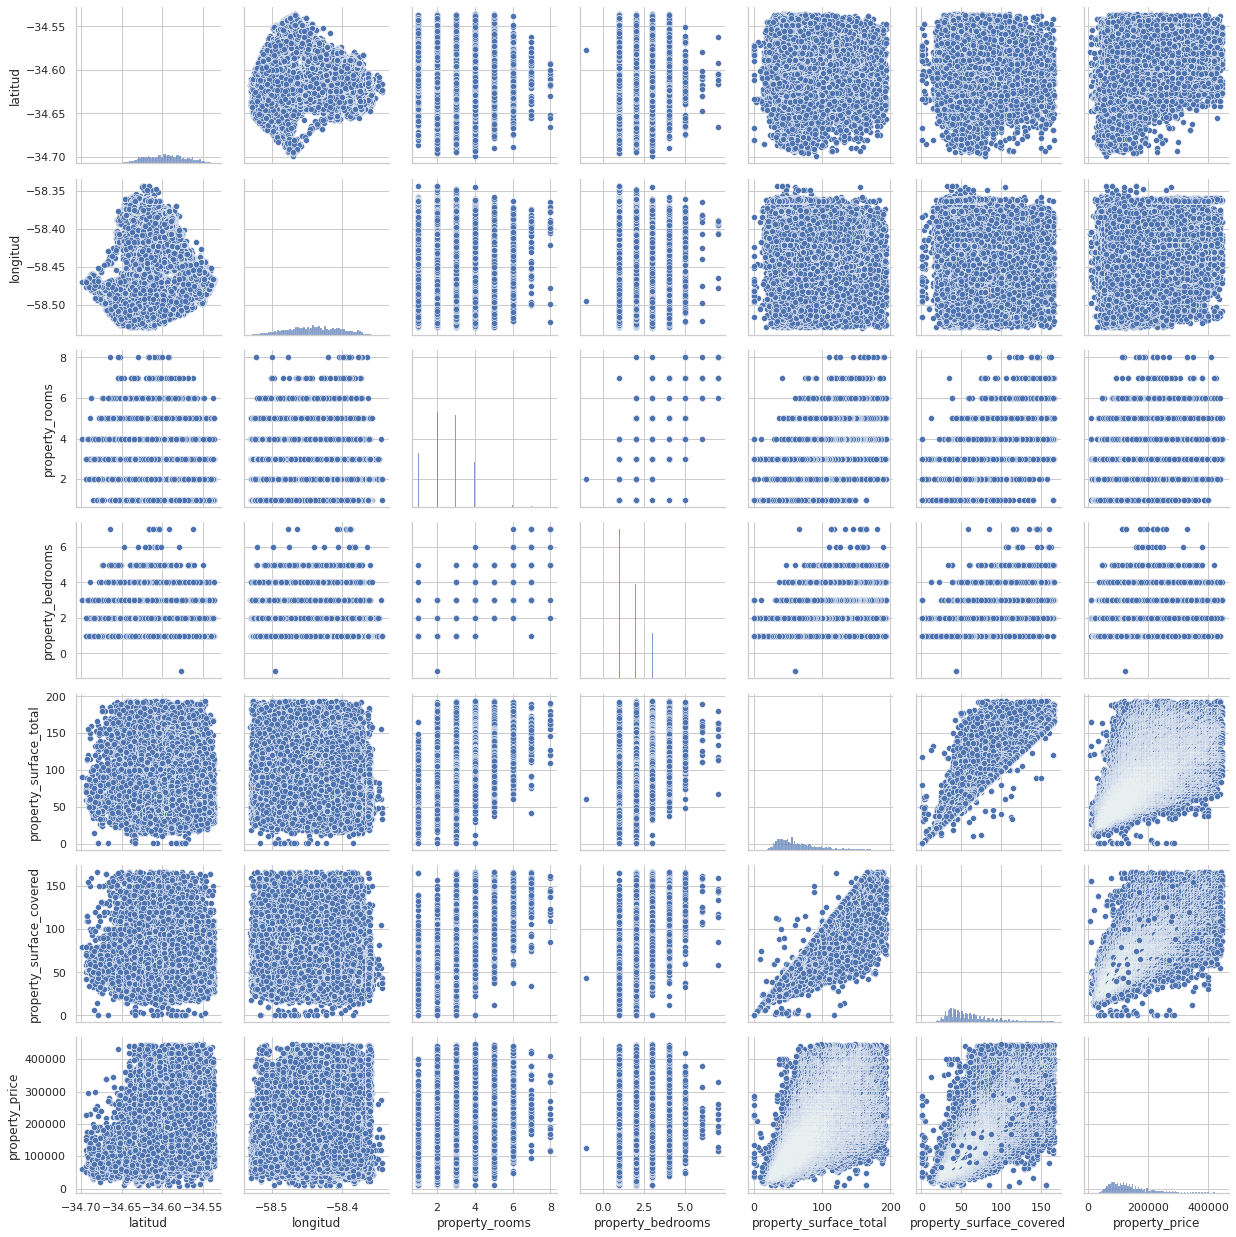

In [ ]:
sns.pairplot(df_knn.iloc[:,0:15])

Sospechamos que las variables **property_surface_covered** y **property_surface_total** pueden llegar a tener cierta correlacion con el precio de la propiedad. 

Decidimos eliminar el ruido reduciendo la cantidad de registros del grafico, para poder verificar la suposición. De esta forma comprobamos que hay una clara correlacion con estas variables y en base a esto seran tenidas en cuenta en los analisis de los modelos.

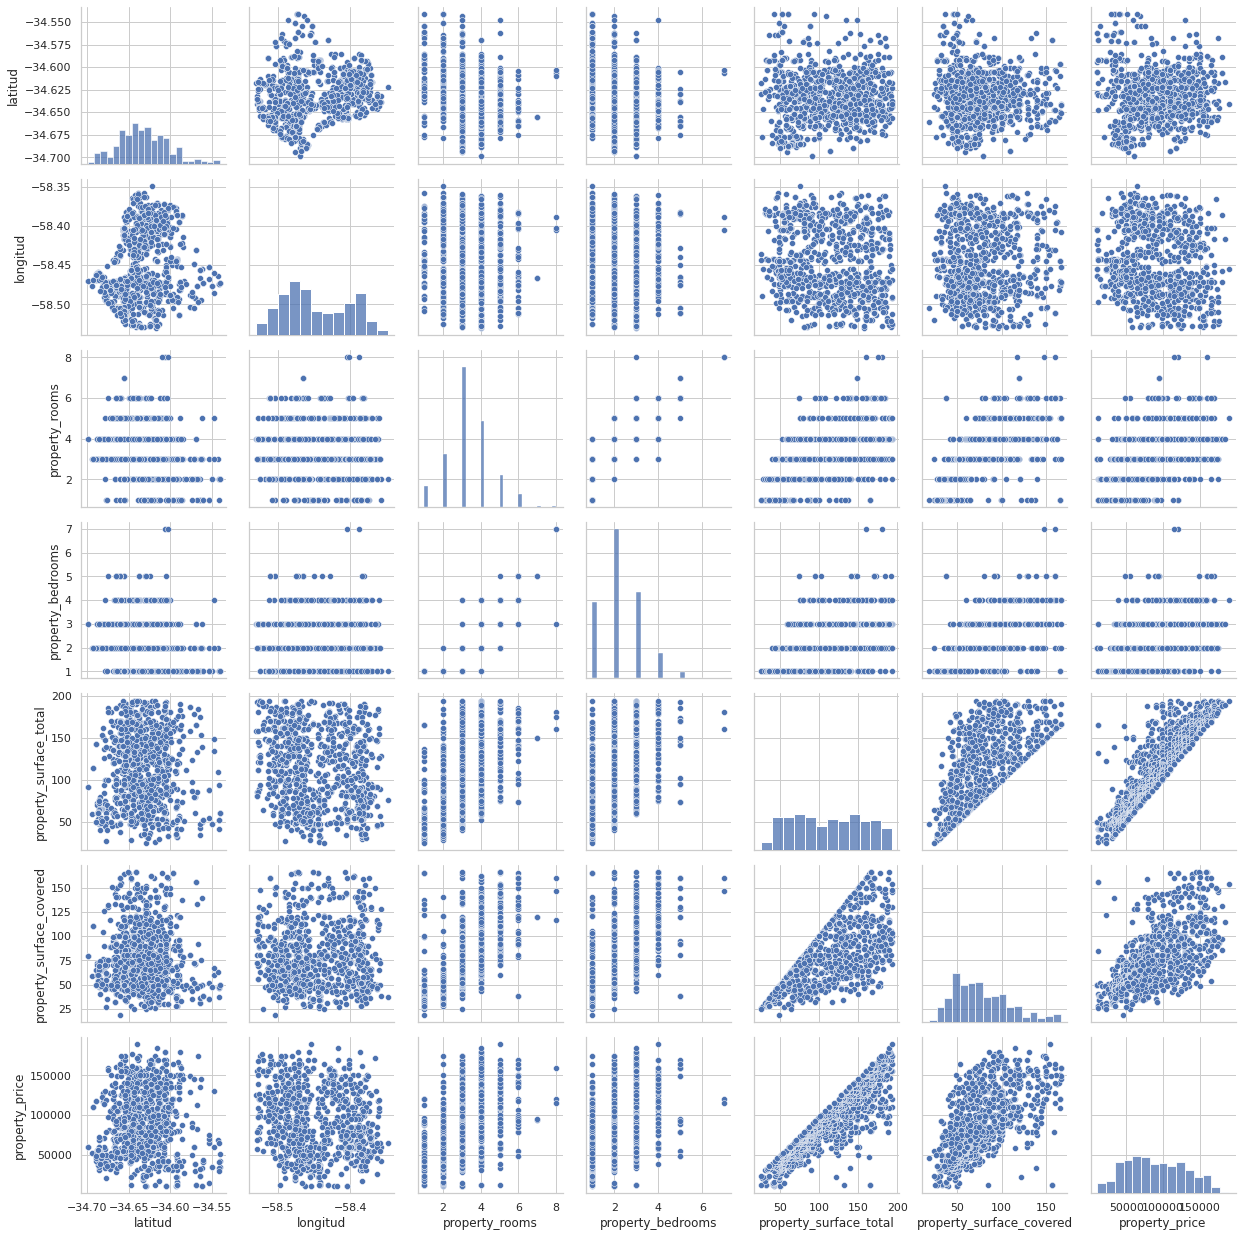

In [ ]:
sns.pairplot(df_knn.iloc[1:1000,0:15])

A continuación volvemos a analizar la correlación a traves de un Heatmap. Nuevamente notamos que en las partes mas coloradas del grafico se encuentran las variables previamente mencionadas.

In [ ]:
df_knn.iloc[:,0:15].corr().style.background_gradient(cmap='coolwarm')

### Entrenamiento y Predicción

Como se estudió en la sección anterior, vamos a tener en cuenta las variables **property_surface_total** y **property_surface_covered** para realizar las predicciones, estableciendo una relación del 80% para el conjunto train y el restante para el test. 

In [ ]:
x = df_knn[['property_surface_total', 'property_surface_covered']]
y = df_knn.property_price

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=12)

A continuación mostramos los graficos en los cuales nos basamos, de forma mas detallada.

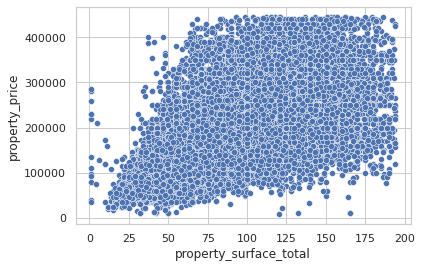

In [ ]:
sns.scatterplot(x=x_train.property_surface_total,y=y_train)

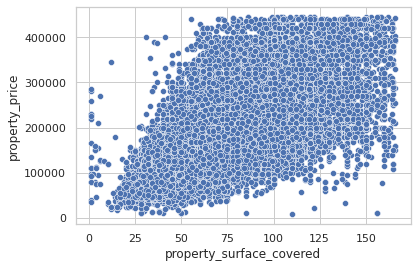

In [ ]:
sns.scatterplot(x=x_train.property_surface_covered,y=y_train)

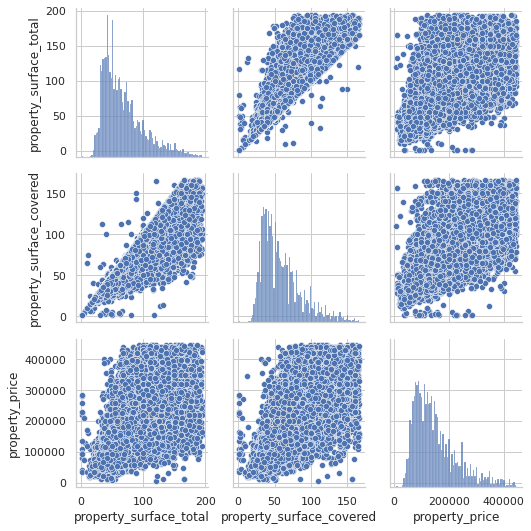

In [ ]:
sns.pairplot(pd.concat([x_train, y_train], axis=1))

A continuación crearemos un modelo, y realizaremos una predicción sobre el mismo utilizando el data set de test.

In [ ]:
knn_regressor = KNeighborsRegressor().fit(x_train, y_train)
y_pred=knn_regressor.predict(x_test)

print(f"La predicción obtenida es: {y_pred}")

La predicción obtenida es: [135740.  132506.  252517.6 ... 204000.   72800.  110580. ]


### Optimización de hiperparámetros

Observemos cuales son los parámetros por default que esta teniendo nuestro modelo.

In [ ]:
knn_regressor.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

En base al entrenamiento y predicciones hechos en las celdas anteriores, notaremos la cantidad de aciertos obtenidos.

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de 14 aciertos, sobre un total de 13138


Veamos que sucede si optimizamos estos parámetros. Recordemos que los que podremos setear serán **n_neighbors**, **algorithm**, **metric** y **weights**.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

Obtuvimos los siguientes resultados

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(knn_regressor, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.58


### Análisis de performance y Métricas

Estudiamos la matriz de confusión observando la densidad de las variables en donde acertamos nuestras predicciones.

A continuación observaremos cual es la performance lograda con el modelo actual. En la siguiente tabla podremos observar para algunos registros una comparación entre su valor real y el resultado de la predicción realizada. De igual manera se calcula el error entre los mismos.

In [ ]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
performance.head()

Valor Real  Prediccion    Error
208379    125000.0    135740.0 -10740.0
437933    165000.0    132506.0  32494.0
105569    258000.0    252517.6   5482.4
98999      83900.0     75266.6   8633.4
422082    105800.0     83100.0  22700.0

Se detallan los valores obtenidos a través las métricas realizadas:

#### Mean Square Error

Esta métrica se encarga de para cada punto, calcular la diferencia cuadrada entre las predicciones y el objetivo. Luego de esto promedia esos valores. 

Lo que buscamos es que estos sean lo mas chico posibles, ya que cuanto mayor peor es el modelo.

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 2837058816.6769094


#### Root Mean Square Error

La diferencia con la métrica anterior es que esta es la raíz cuadrada de MSE. Lo que buscamos con esto es hacer que la escala de errores sea igual a la de los objetivos.

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 53264.04806881382


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score_knn = knn_regressor.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score_knn}")

El coeficiente de 'determinación' es: 0.5910565095909068


## Modelo XGBoost

### Entrenamiento y prediccion

In [ ]:
df_xgb = df.copy()

In [ ]:
df_xgb.rename(columns={'property_price':'target'}, inplace=True)
df_xgb.target.value_counts(normalize=True)

110000.0    0.018146
85000.0     0.017598
120000.0    0.017218
125000.0    0.016822
115000.0    0.016609
              ...   
111549.0    0.000015
291785.0    0.000015
182429.0    0.000015
214899.0    0.000015
80200.0     0.000015
Name: target, Length: 3668, dtype: float64

In [ ]:
features=list(df_xgb.columns[10:14])
print(features)

['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_xgb[features].values, 
                                                    df_xgb['target'].values, 
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
xgb_model = xgb.XGBRegressor(random_state=0, n_estimators=100)
xgb_model.fit(x_train, y_train)

[03:36:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


### Optimizacion de hiperparametros

In [ ]:
xgb_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de 5 aciertos, sobre un total de 13138


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgb_model, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

[03:36:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:15] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:36:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Análisis de performance y métricas

In [ ]:
performance = pd.DataFrame({'Valor Real': y_test,
                            'Prediccion': y_pred,
                            'Error': y_test - y_pred})
performance.head()

Valor Real  Prediccion     Error
0    168000.0    135740.0   32260.0
1     88000.0    132506.0  -44506.0
2     87000.0    252517.6 -165517.6
3     76000.0     75266.6     733.4
4     72000.0     83100.0  -11100.0

#### Mean Square Error

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 11708120884.381979


#### Root Mean Square Error

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 108204.07055366253


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score = xgb_model.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score}")

El coeficiente de 'determinación' es: 0.6374000728459787


## Modelo Adaboost

### Entrenamiento y predicción

In [ ]:
df_adb = df.copy()

In [ ]:
df_adb.rename(columns={'property_price':'target'}, inplace=True)
df_adb.target.value_counts(normalize=True)

110000.0    0.018146
85000.0     0.017598
120000.0    0.017218
125000.0    0.016822
115000.0    0.016609
              ...   
111549.0    0.000015
291785.0    0.000015
182429.0    0.000015
214899.0    0.000015
80200.0     0.000015
Name: target, Length: 3668, dtype: float64

In [ ]:
features=list(df_adb.columns[10:14])
print(features)

['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered']


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_adb[features].values, 
                                                    df_adb['target'].values, 
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada_reg = AdaBoostRegressor(n_estimators=100)

In [ ]:
ada_reg.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100)

### Optimización de hiperparametros

In [ ]:
ada_reg.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': None}

In [ ]:
print("Se obtuvo un total de", np.sum(y_test == y_pred), "aciertos, sobre un total de", len(y_test))

Se obtuvo un total de 5 aciertos, sobre un total de 13138


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

params_grid={ 'n_neighbors':range(1,30), 
              'weights':['distance','uniform'],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
              'metric':['euclidean','manhattan','chebyshev']
             }

### Análisis de performance y métricas

In [ ]:
kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(ada_reg, x_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean())

K-fold CV average score: 0.57


In [ ]:
from sklearn.metrics import mean_squared_error


#### Mean Square Error

In [ ]:
from sklearn import metrics

mse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = True
       )

print(f"El error según la métrica 'Mean Square Error' de test es: {mse}")

El error según la métrica 'Mean Square Error' de test es: 11708120884.381979


#### Root Mean Square Error

In [ ]:
rmse = metrics.mean_squared_error(
        y_true  = y_test,
        y_pred  = y_pred,
        squared = False
       )

print(f"El error según la métrica 'Root Mean Square Error' de test es: {rmse}")

El error según la métrica 'Root Mean Square Error' de test es: 108204.07055366253


#### Coeficiente de determinación R2

Lo que hace esta métrica es liberarse de la escala que poseen los valores, ya que siempre se va a encontrar entre menos infinito y 1.

In [ ]:
score = xgb_model.score(x_test, y_test)

print(f"El coeficiente de 'determinación' es: {score}")

El coeficiente de 'determinación' es: 0.6374000728459787


#  **5. Conclusiones**

Para finalizar el informe, haremos un pequeño repaso sobre todos los puntos que analizamos y sus respectivos resultados y/o observaciones hechos por nosotros:
	
Con respecto a los outliers obtenidos a lo largo del trabajo, pudimos observar que contamos con una mayor certeza de determinación de los mismos al realizar análisis multivariados, dado que se cuenta con más datos del entorno. Estos valores atípicos fueron analizados a través de diferentes métodos y en su mayoría posteriormente descartados del dataset.

Por otro lado, uno de los puntos a destacar dentro de los modelos de clasificación fue la diferencia en el score entre el entrenamiento con las variables normales y reducidas en el modelo KNN. Hubo un mejoramiento notable entre ambas predicciones. Posiblemente esto sea porque al calcular las distancias entre vecinos es importante que todas las variables esten en órdenes de magnitud similares.

Otro punto interesante fue la similitud entre la clasificación que obtuvimos por árbol de decisión comparándola con el agrupamiento por K-means. Se encontró que se formaron tres grupos similares, distribuidos aproximadamente por las mismas zonas. Además, el modelo de árbol de decisión fue el más fácil de analizar gráficamente.

Para la parte de regresión estuvimos estudiando 3 modelos. Por un lado utilizamos KNN. Si bien este modelo resulta el más sencillo de todos, suele ser el que peores predicciones realiza. Pasando al XGBoost, a pesar de que obtuvimos una menor cantidad de aciertos, el porcentaje obtenido mediante kfold fue superior. Utilizando el último modelo no notamos grandes variaciones en las métricas percibidas. Cabe destacar que en los tres obtuvimos errores entre las mediciones que son extremadamente altos. Esto nos llamó mucho la atención, y lo atribuímos a algún error cometido involuntariamente durante algún procesamiento.  

A lo largo de este trabajo práctico, logramos tener un primer acercamiento con estas tareas del análisis de datos. En particular, debimos tomar muchas decisiones cuyo impacto es difícil de estimar en el resultado final. Un ejemplo de ello fue la complejidad de decidir sobre el reemplazo de valores nulos en el dataset original de manera que no afecte la distribución natural de los datos. Concluimos, entonces, que el análisis de datos es una tarea compleja y para hacerlo de manera eficiente se tienen que realizar diversos y detallados análisis de todas las variables comprometidas.

